In [ ]:
# import all library

In [627]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")


In [628]:
data=pd.read_csv("water_potability (1).csv")

In [629]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [630]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [631]:
data.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [632]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [633]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [634]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

# Handling missing values

In [635]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [636]:
data.fillna(data.mean(),inplace=True)

In [637]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [638]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

# DATA ANALYSIS

Potability
0    1998
1    1278
Name: count, dtype: int64

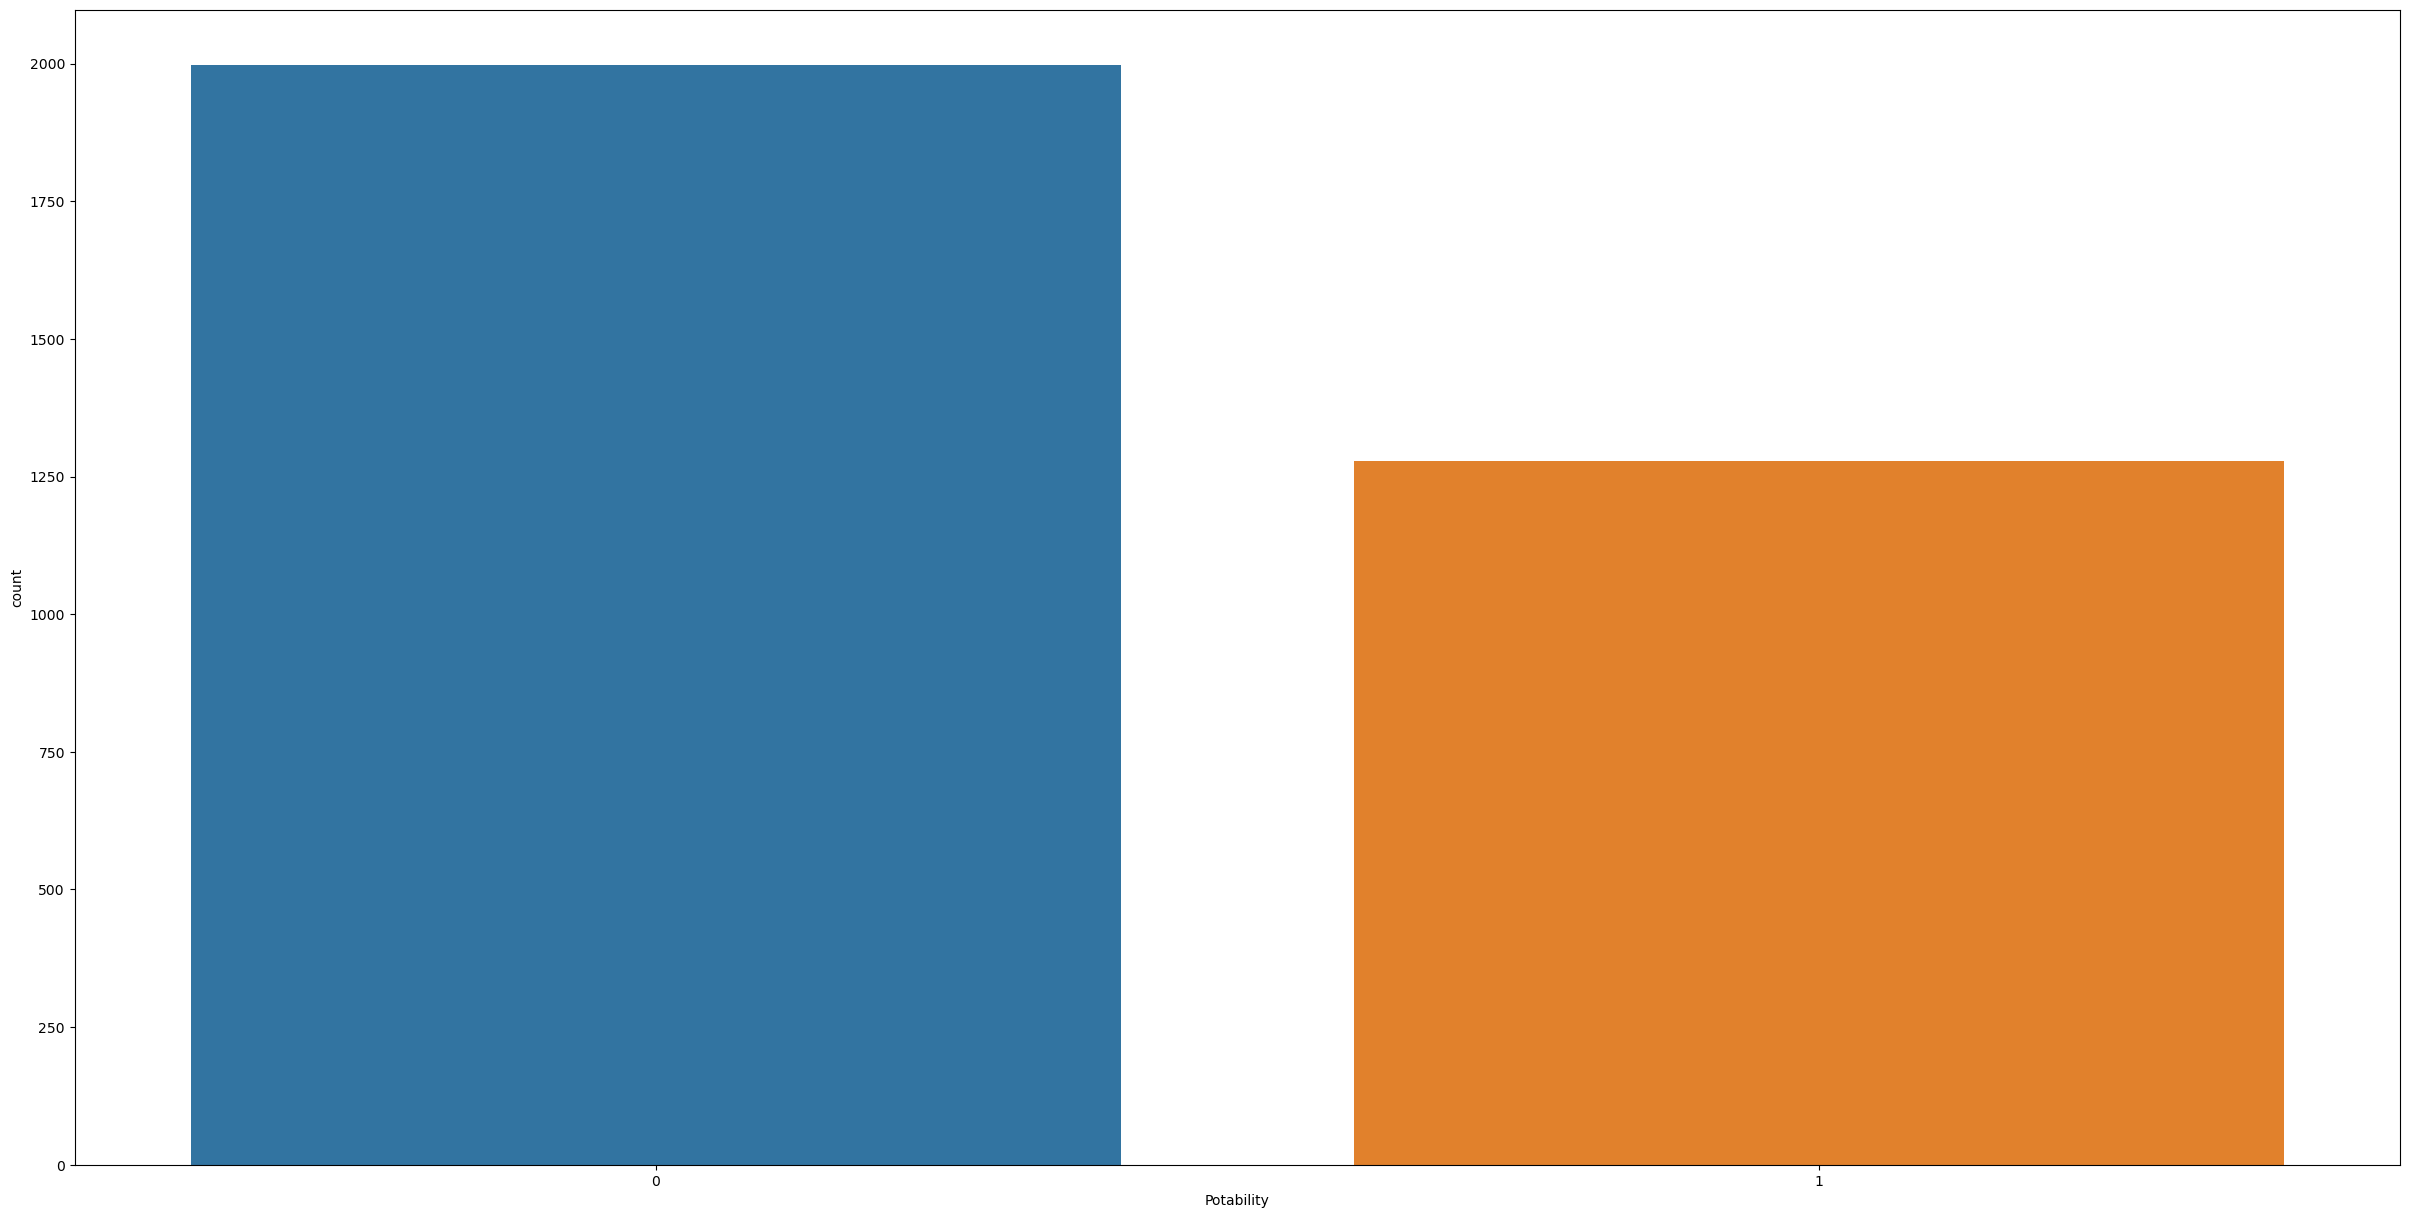

In [639]:
sns.countplot(data=data,x=data.Potability )
data.Potability .value_counts()

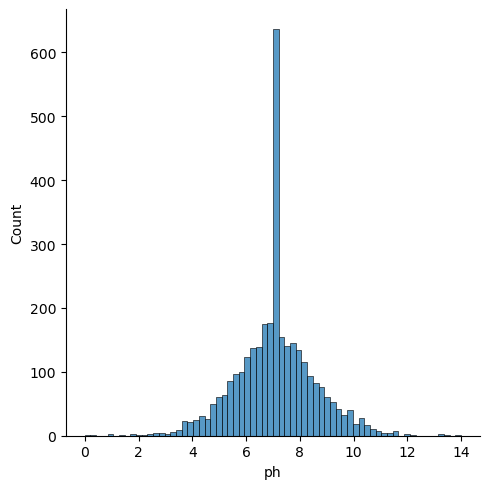

In [640]:
sns.displot(data.ph,)

<Axes: xlabel='ph', ylabel='Density'>

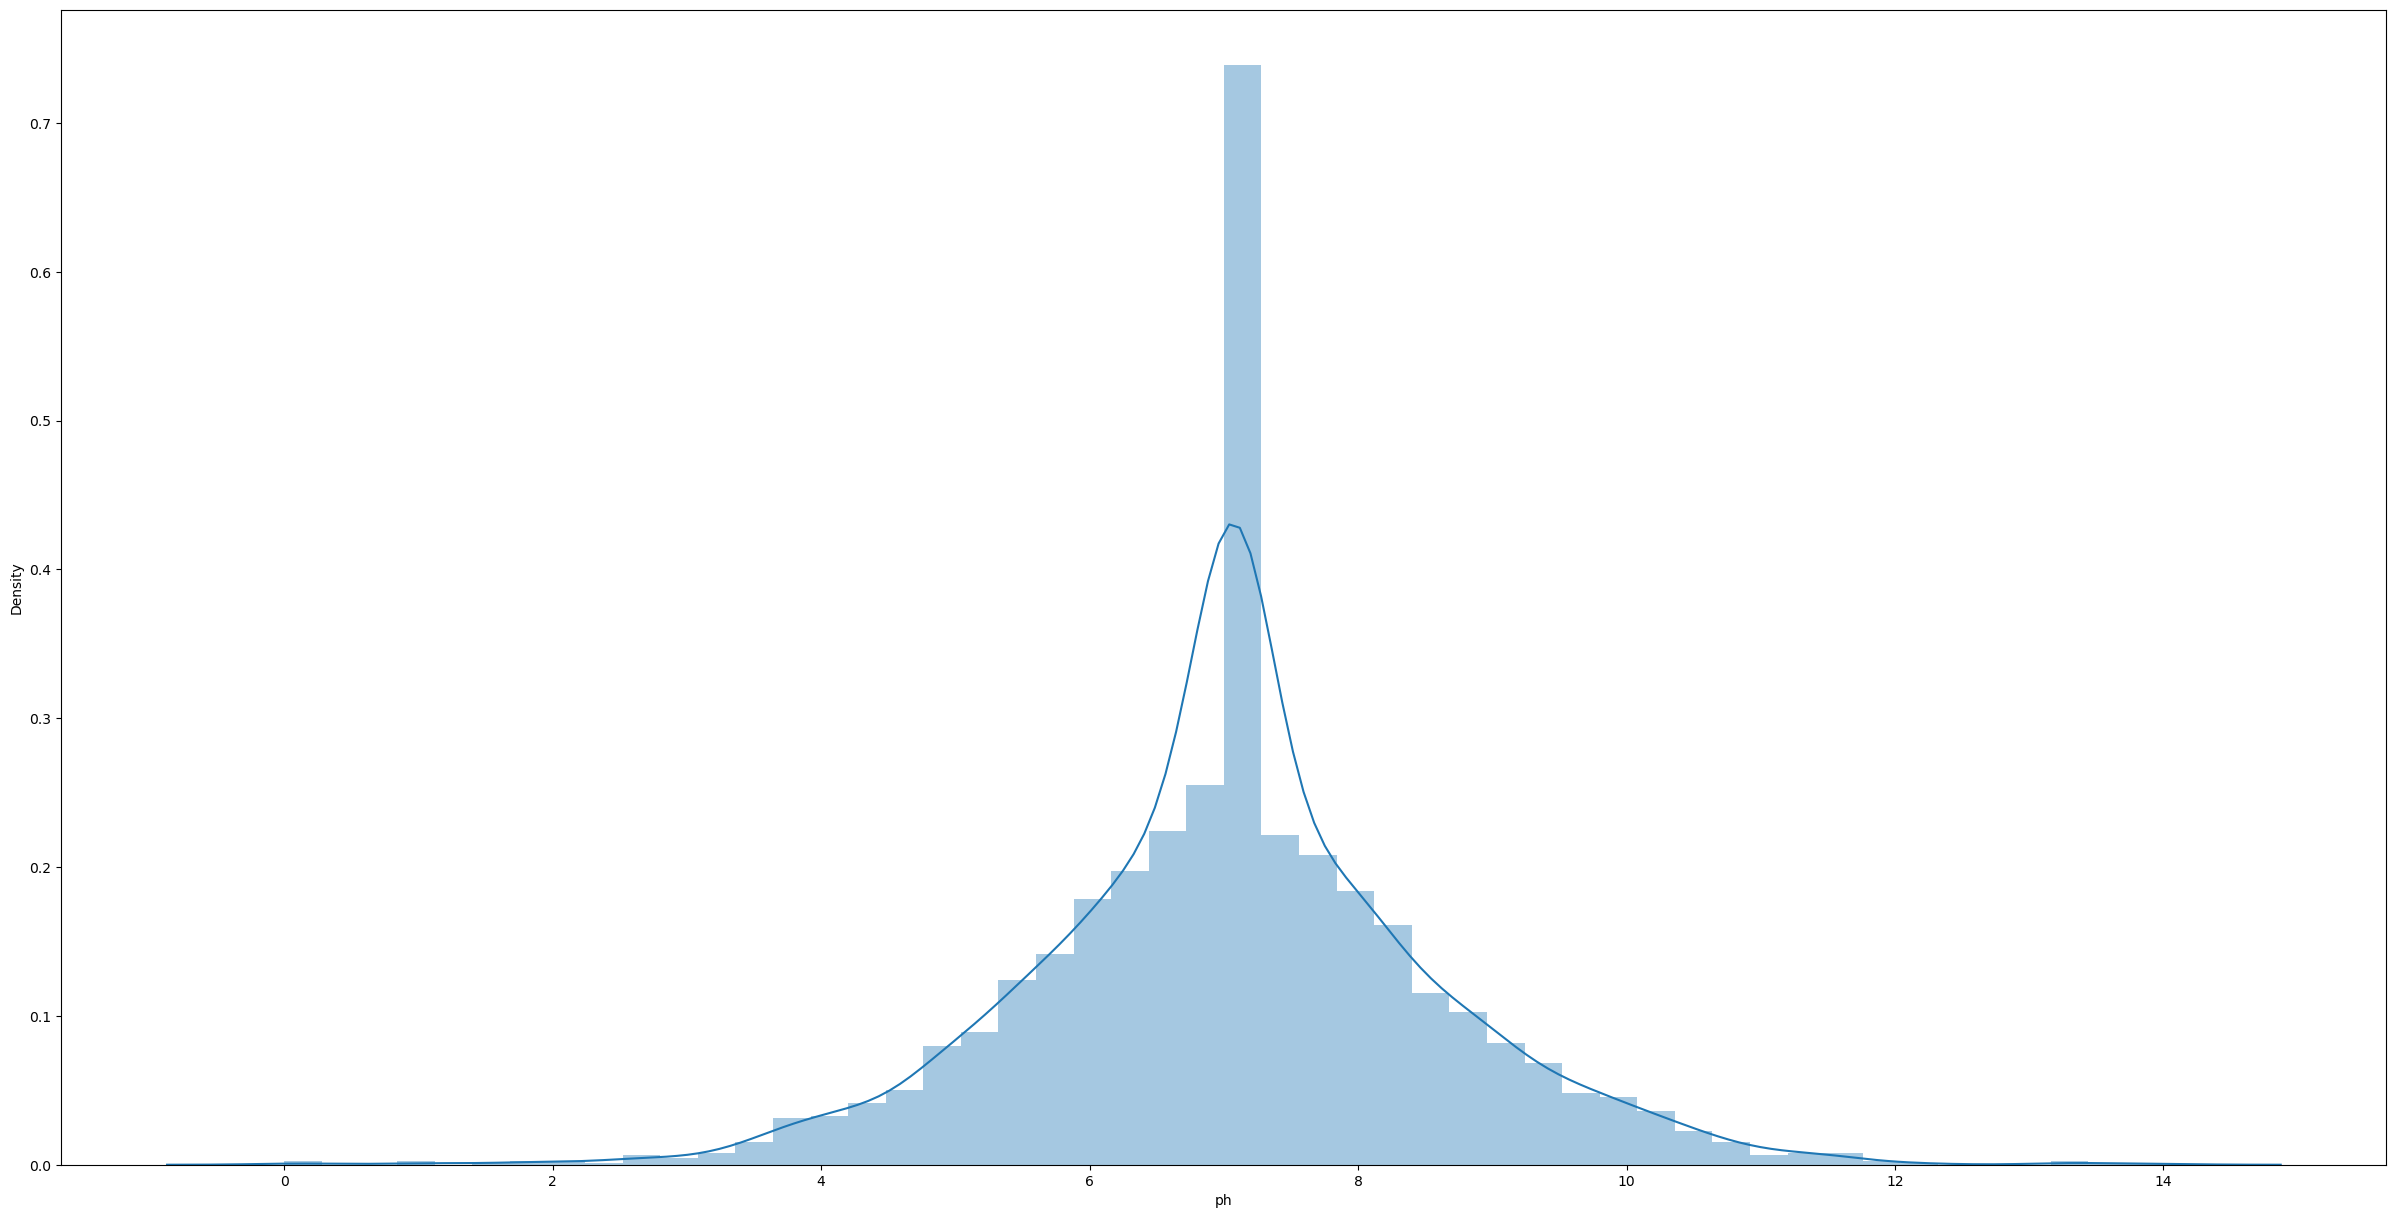

In [641]:
sns.distplot(data.ph)

<Axes: xlabel='Sulfate', ylabel='Density'>

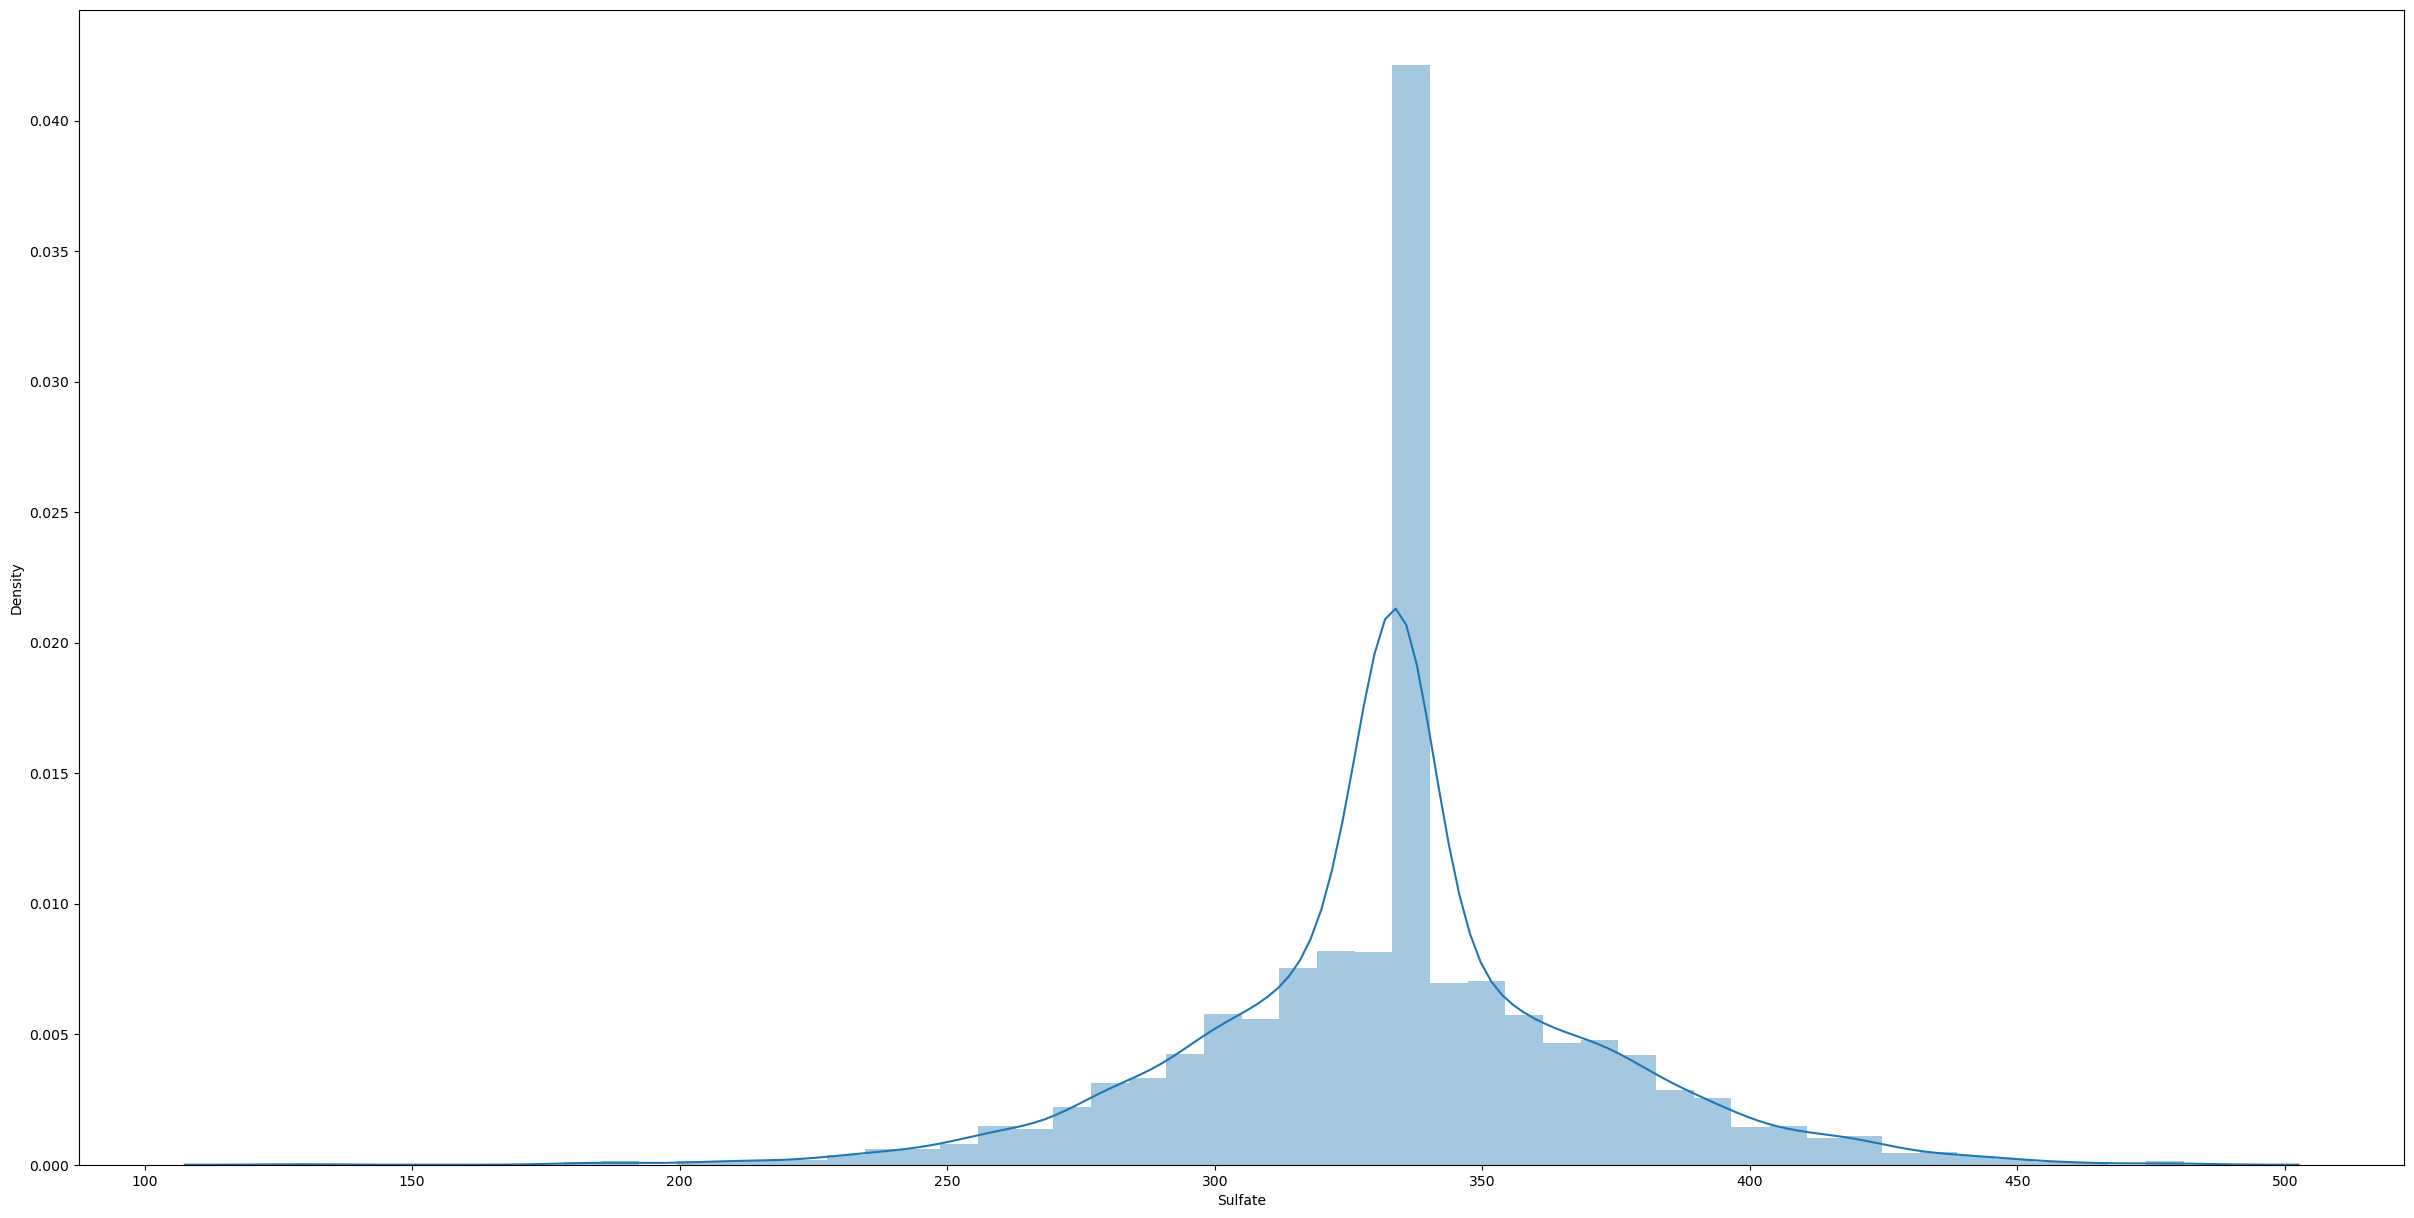

In [642]:
sns.distplot(data.Sulfate)

<Axes: xlabel='Trihalomethanes', ylabel='Density'>

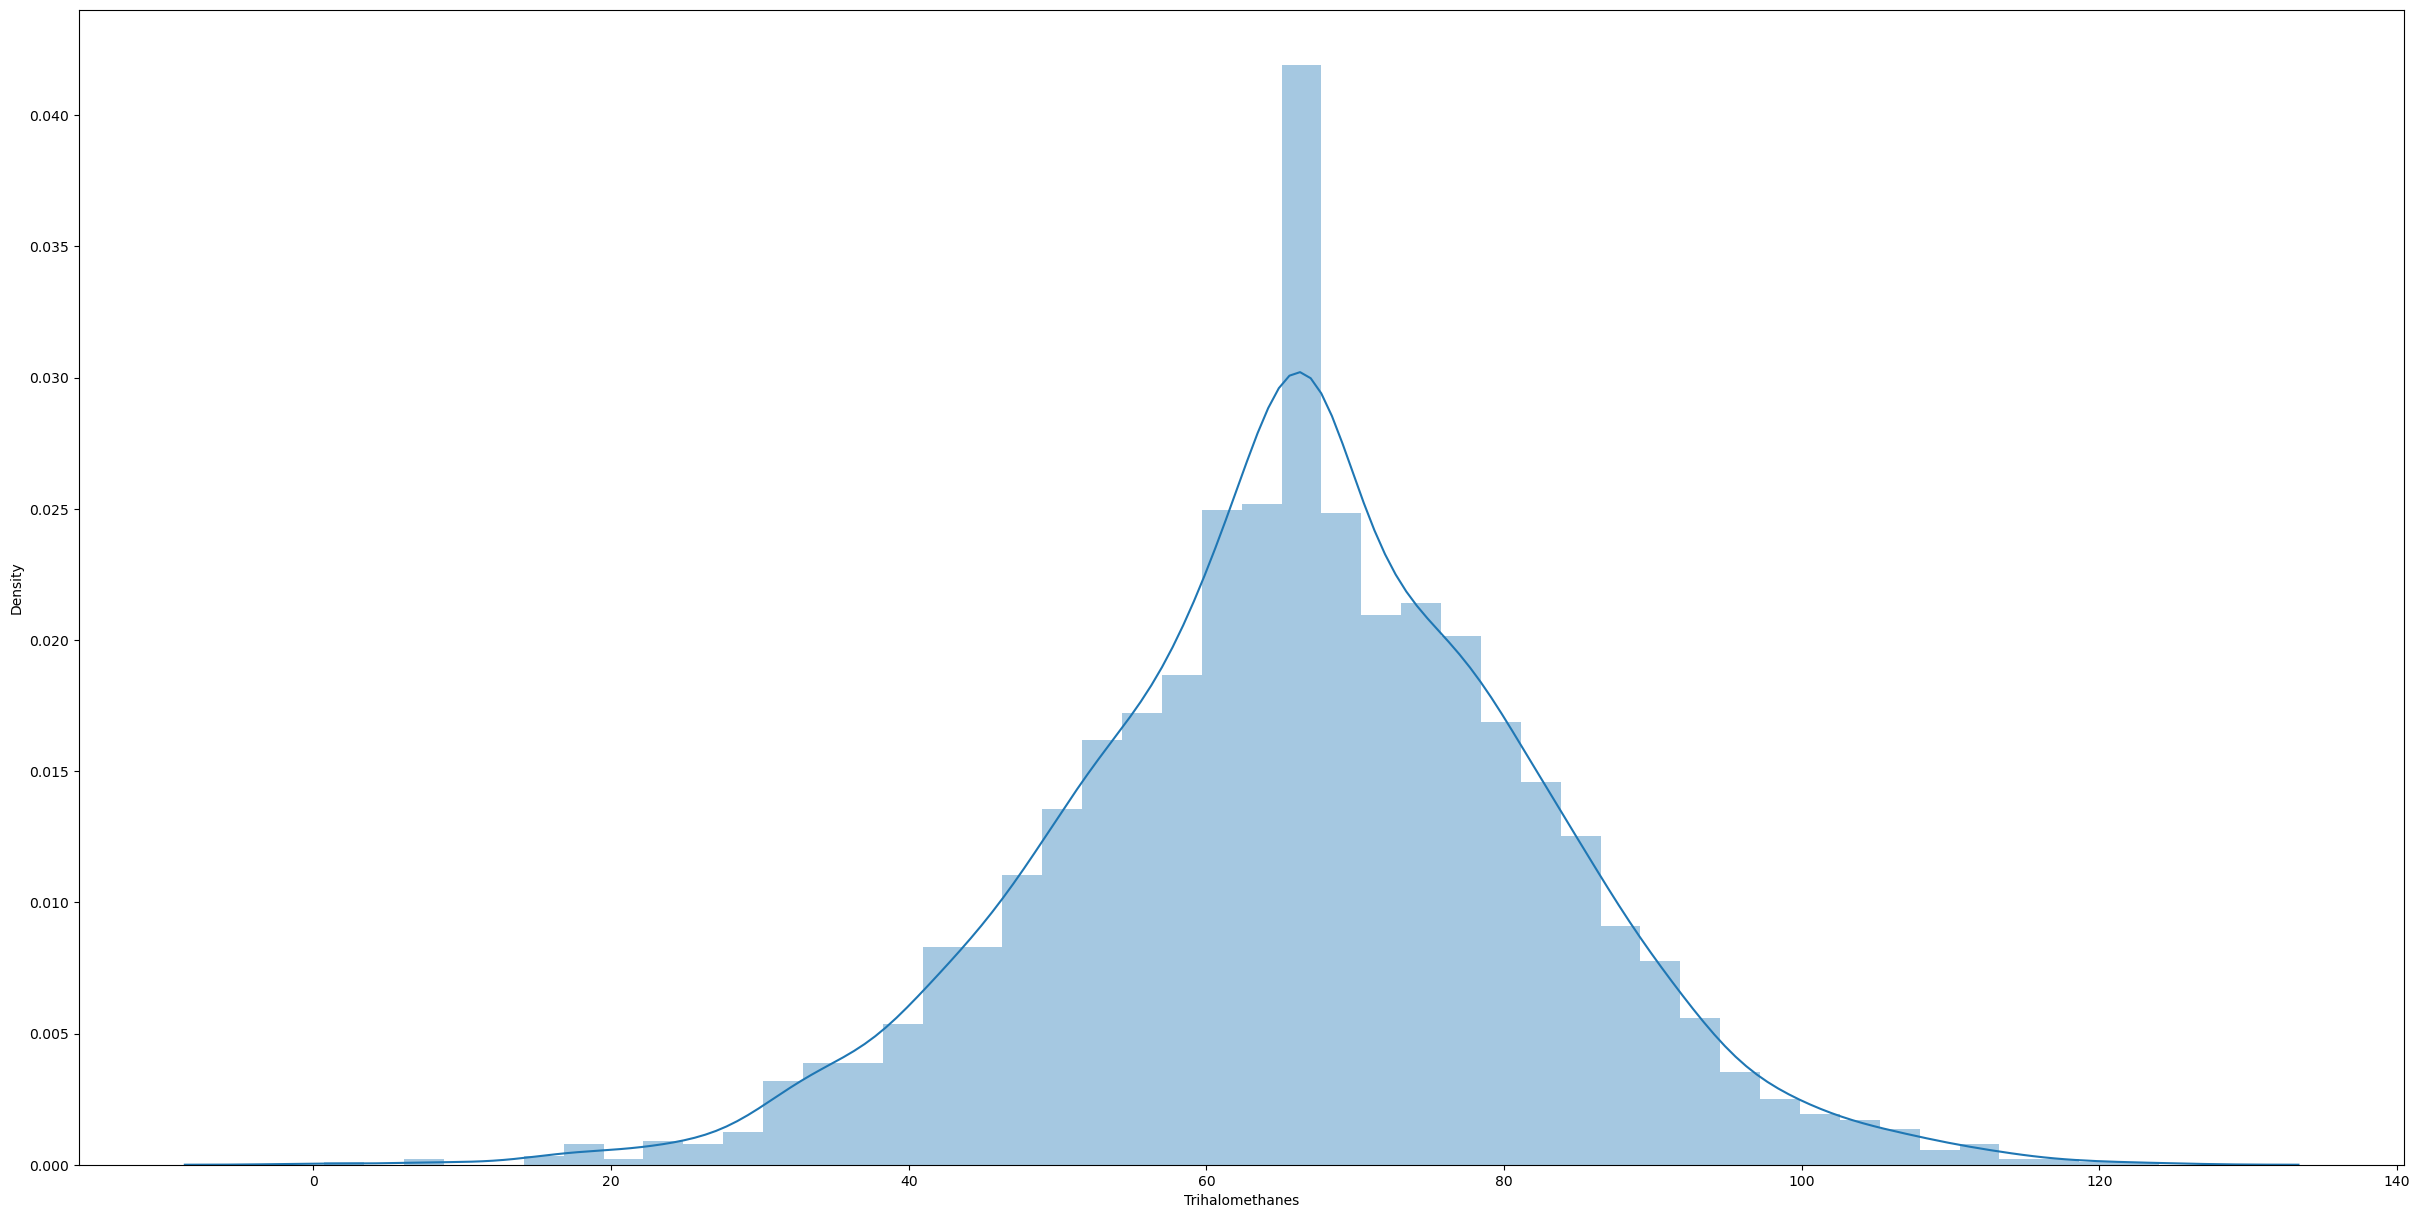

In [643]:
sns.distplot(data.Trihalomethanes)

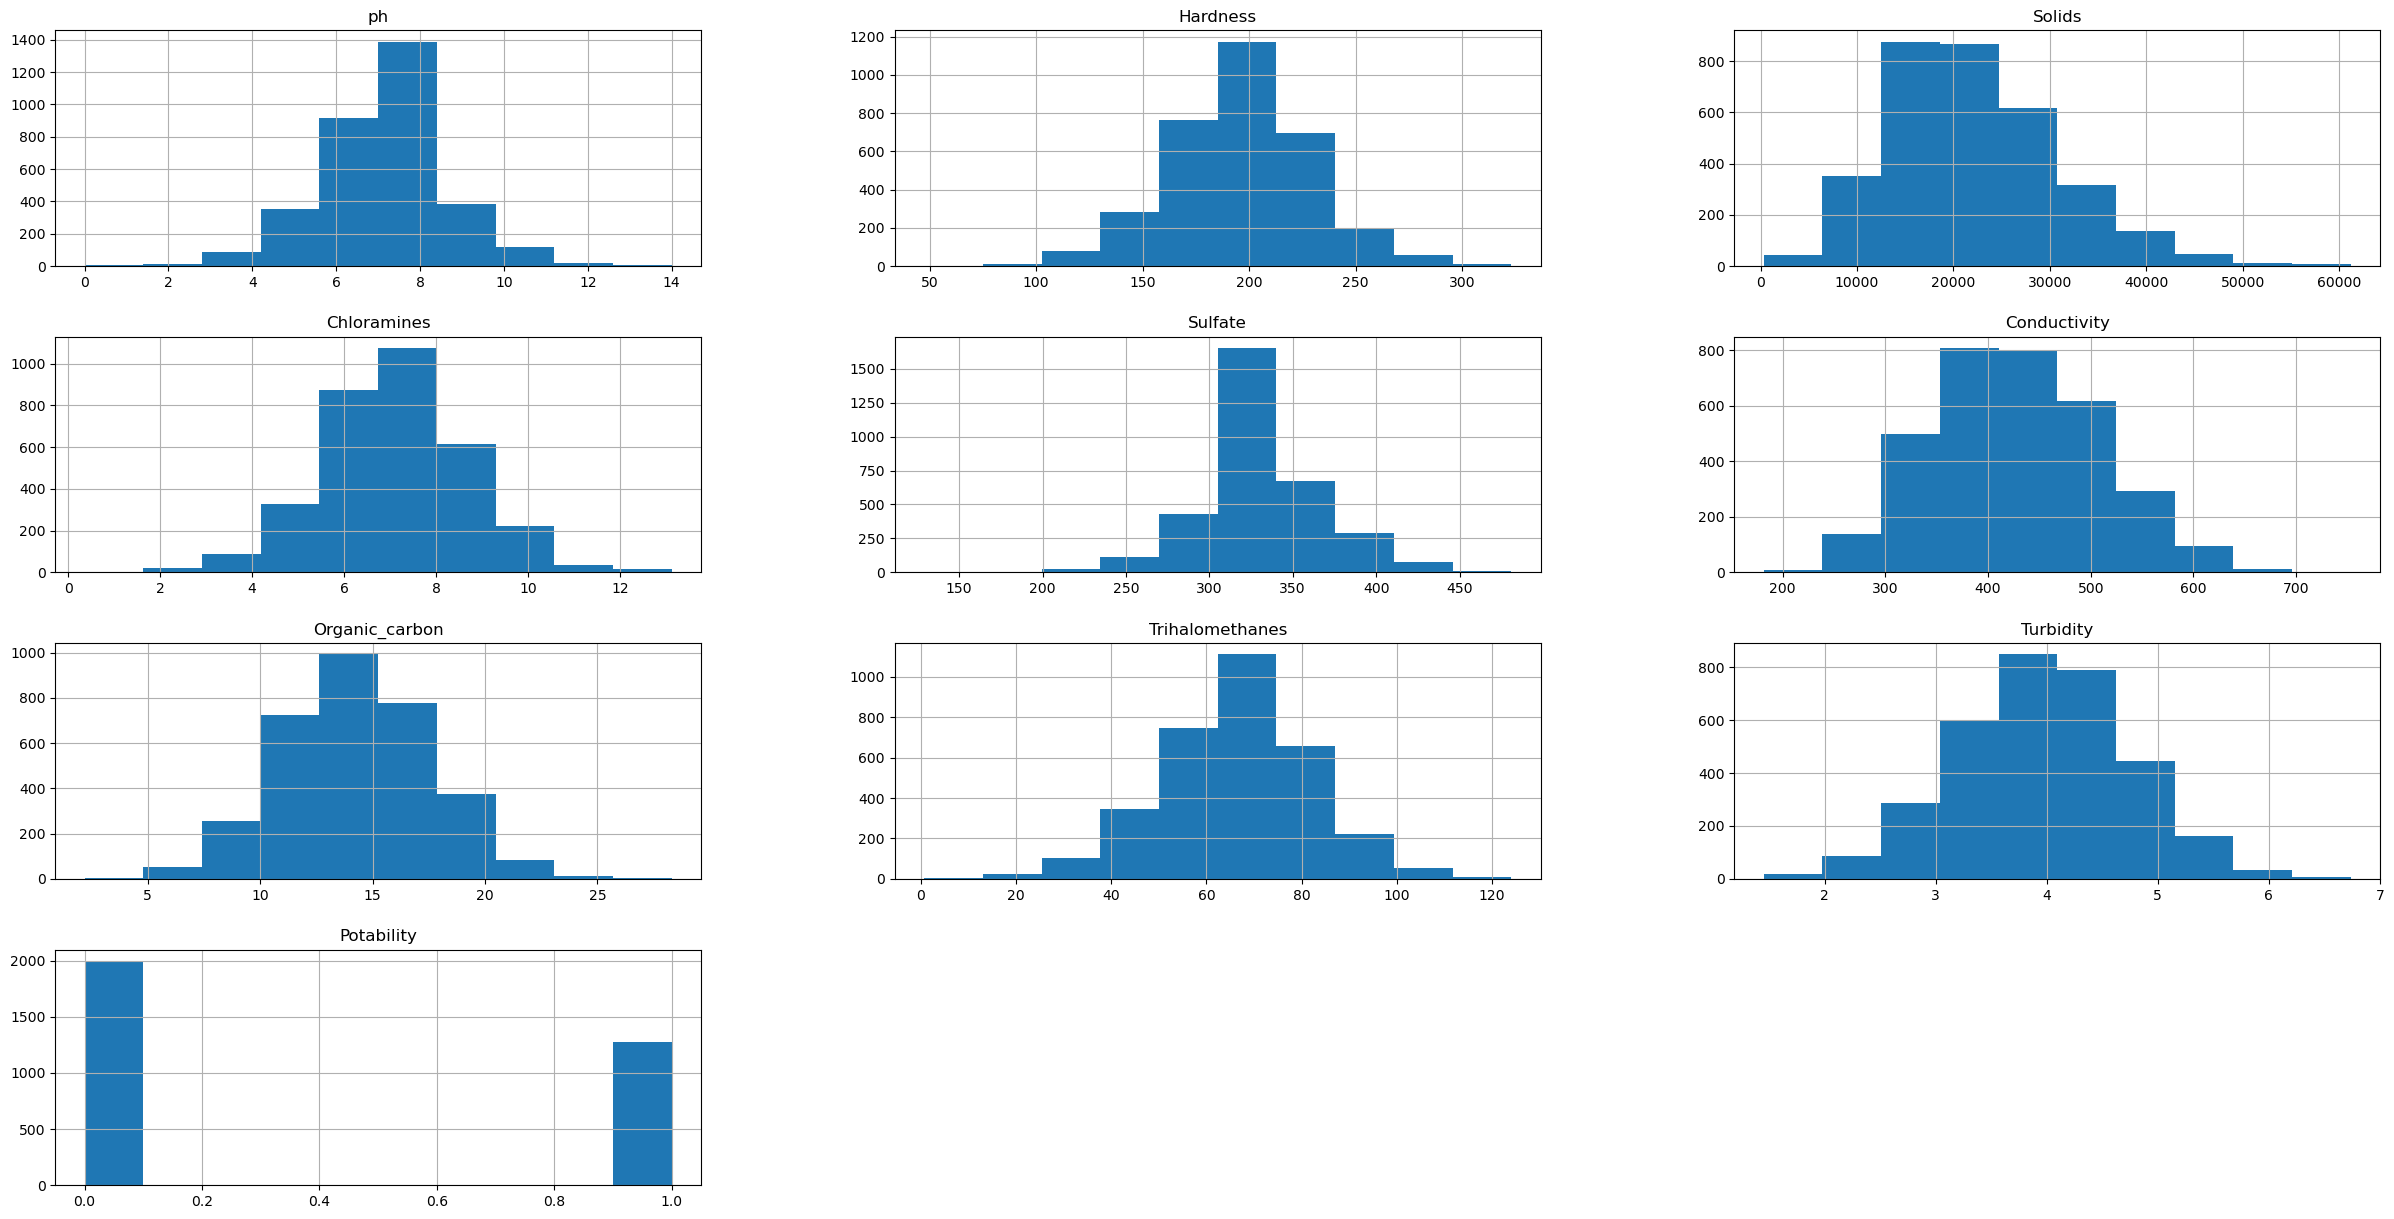

In [644]:
plt.rcParams['figure.figsize'] = [30,15]
data.hist()
plt.show()

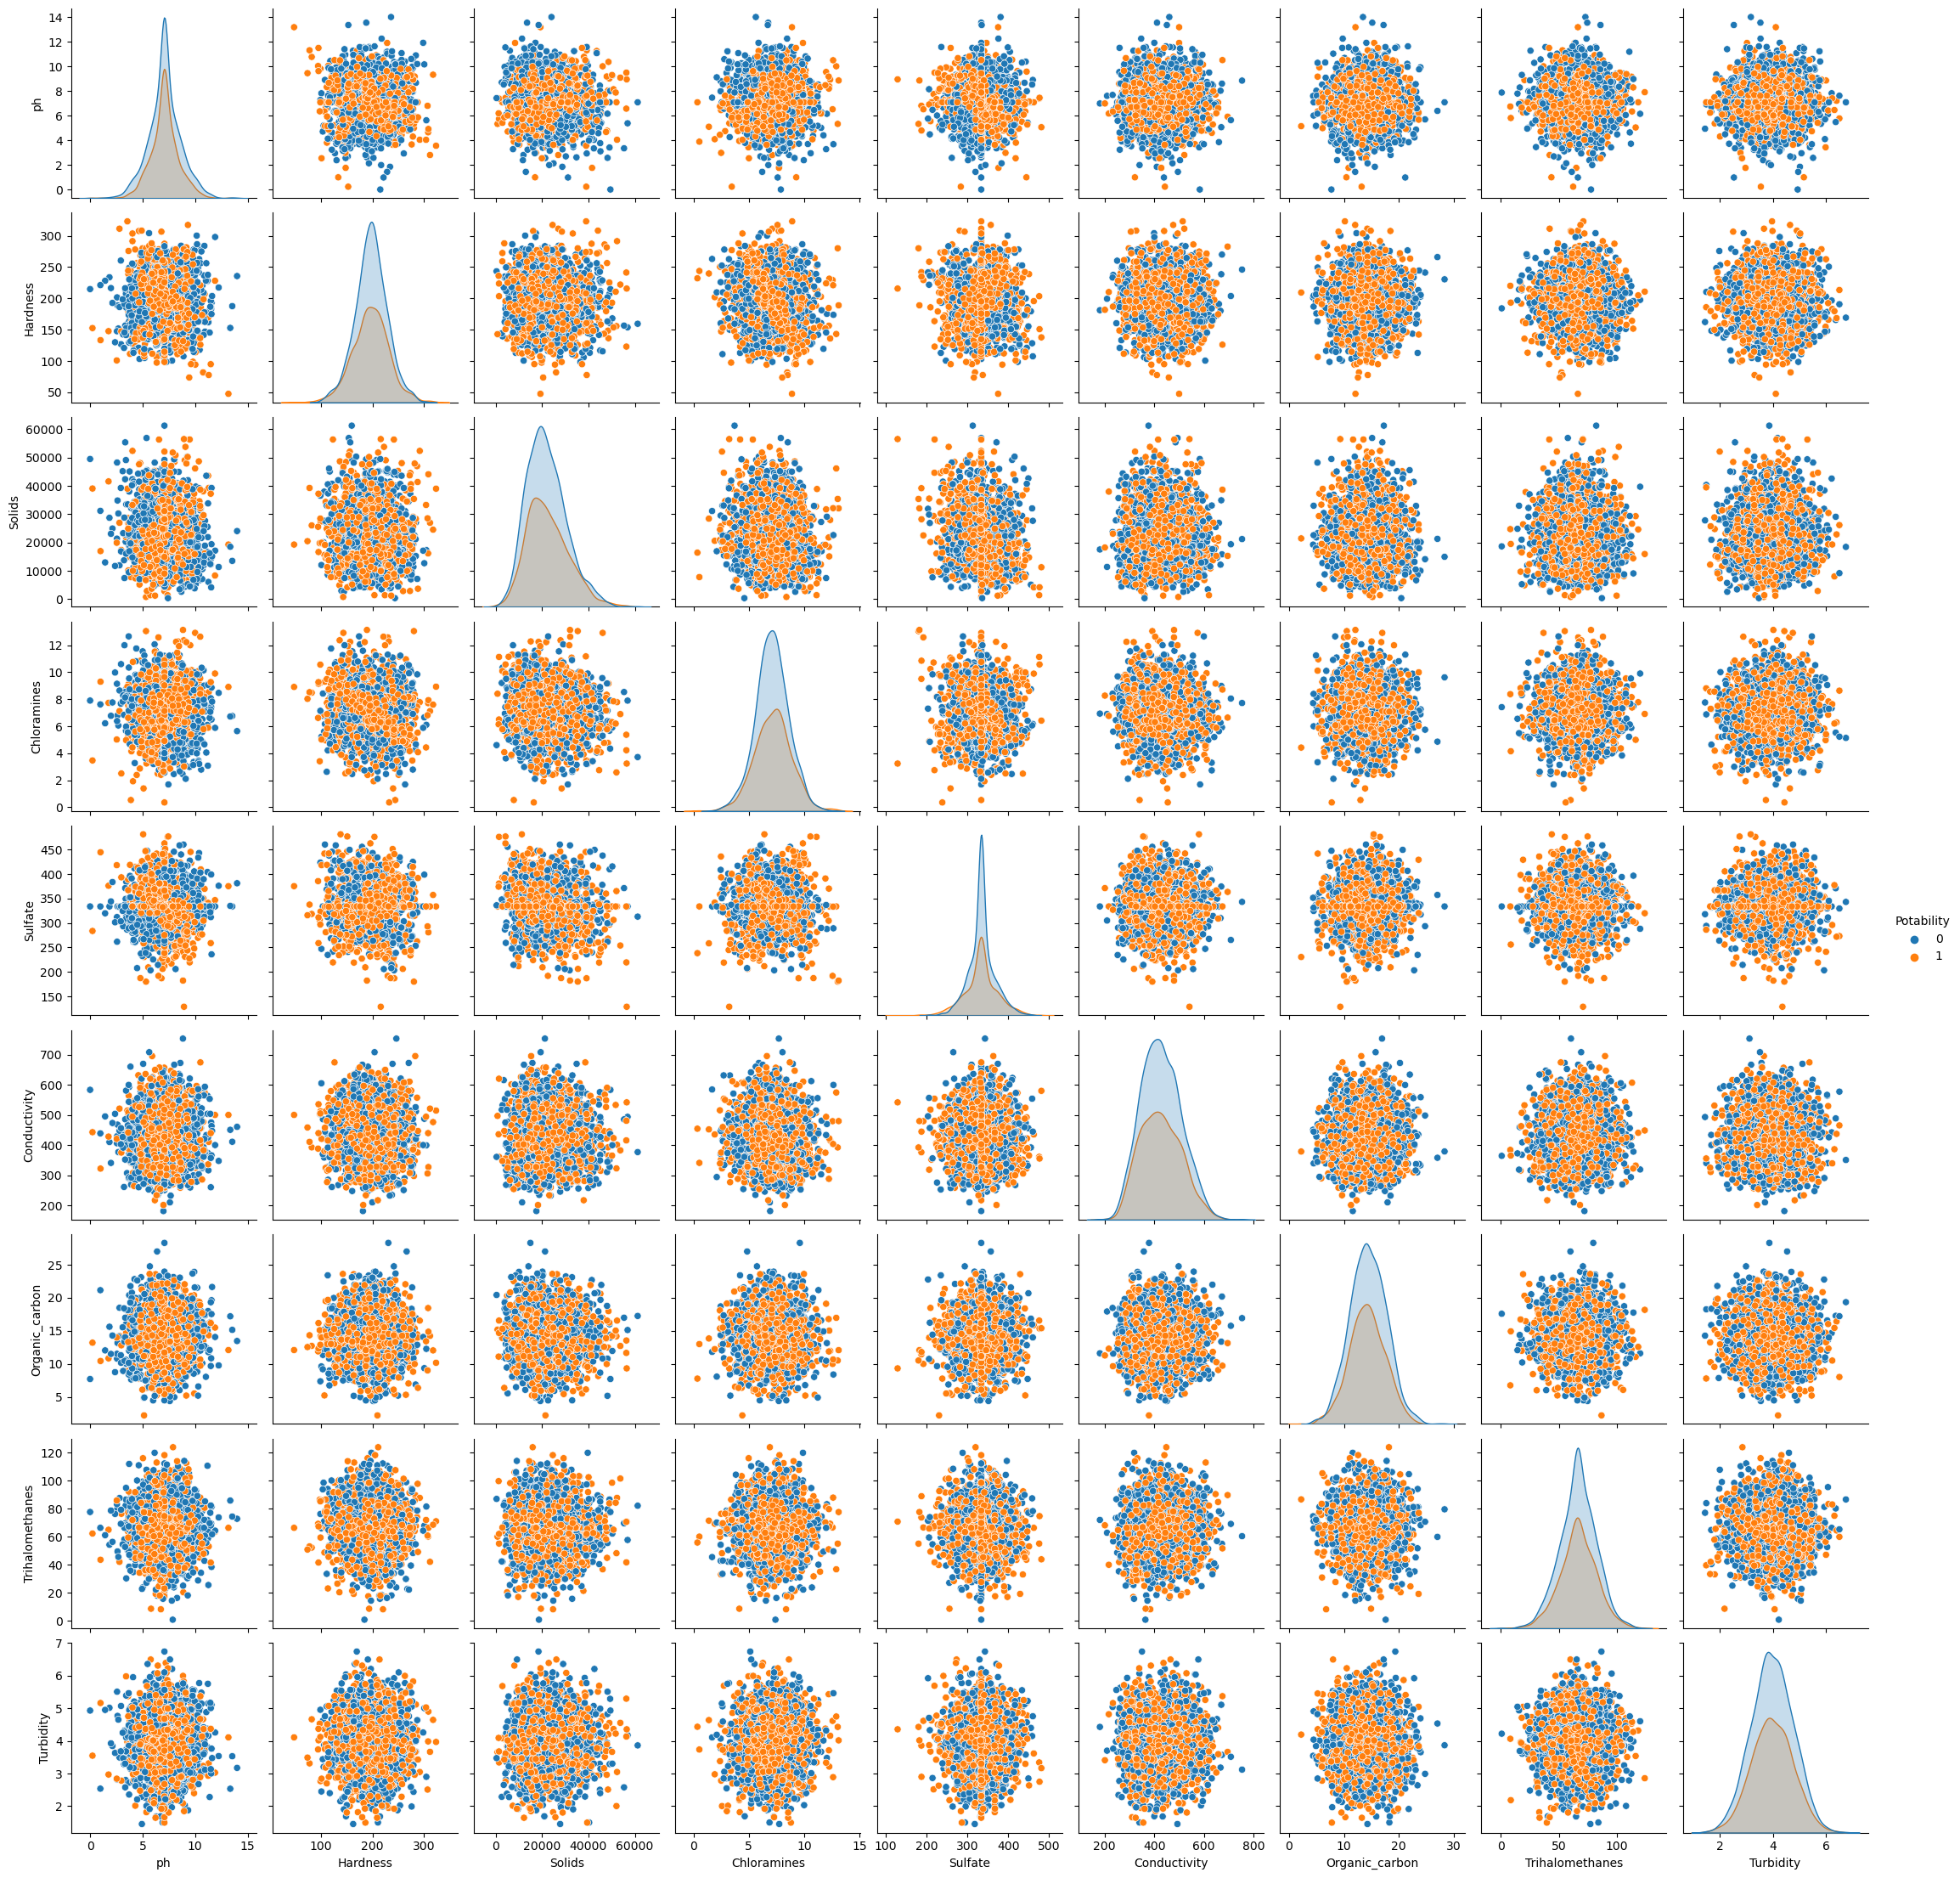

In [645]:
sns.pairplot(data=data,hue="Potability")

<Axes: >

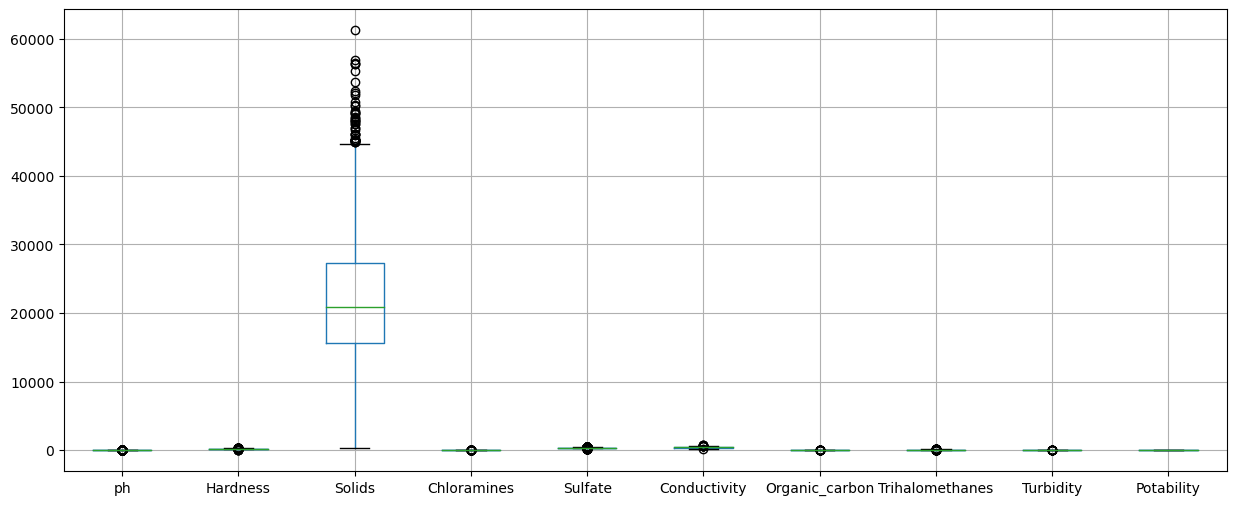

In [646]:
data.boxplot(figsize=(15,6))

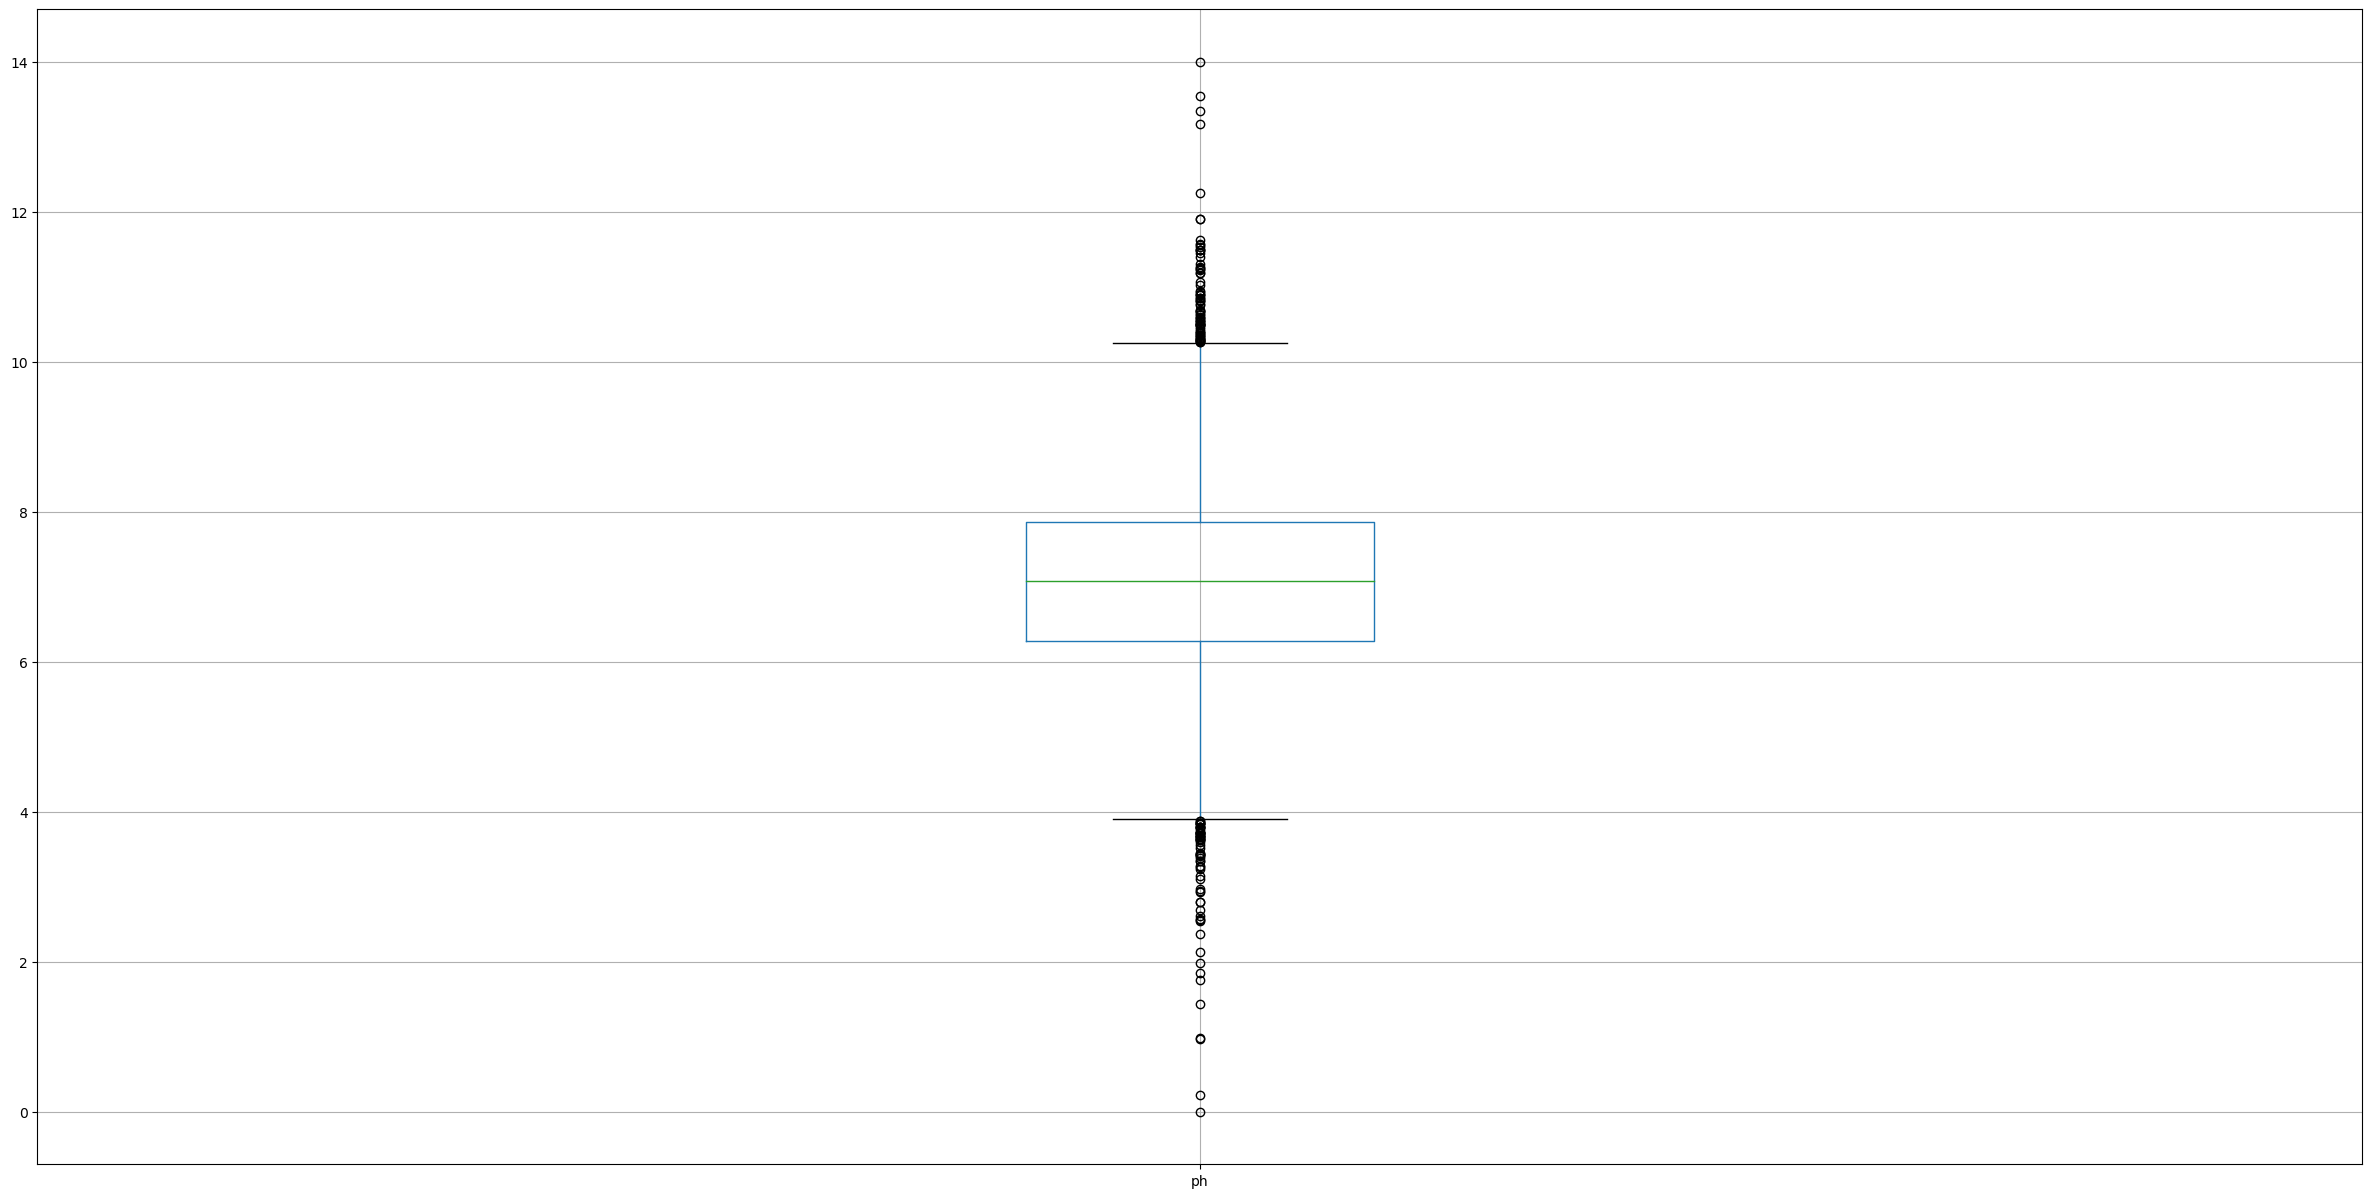

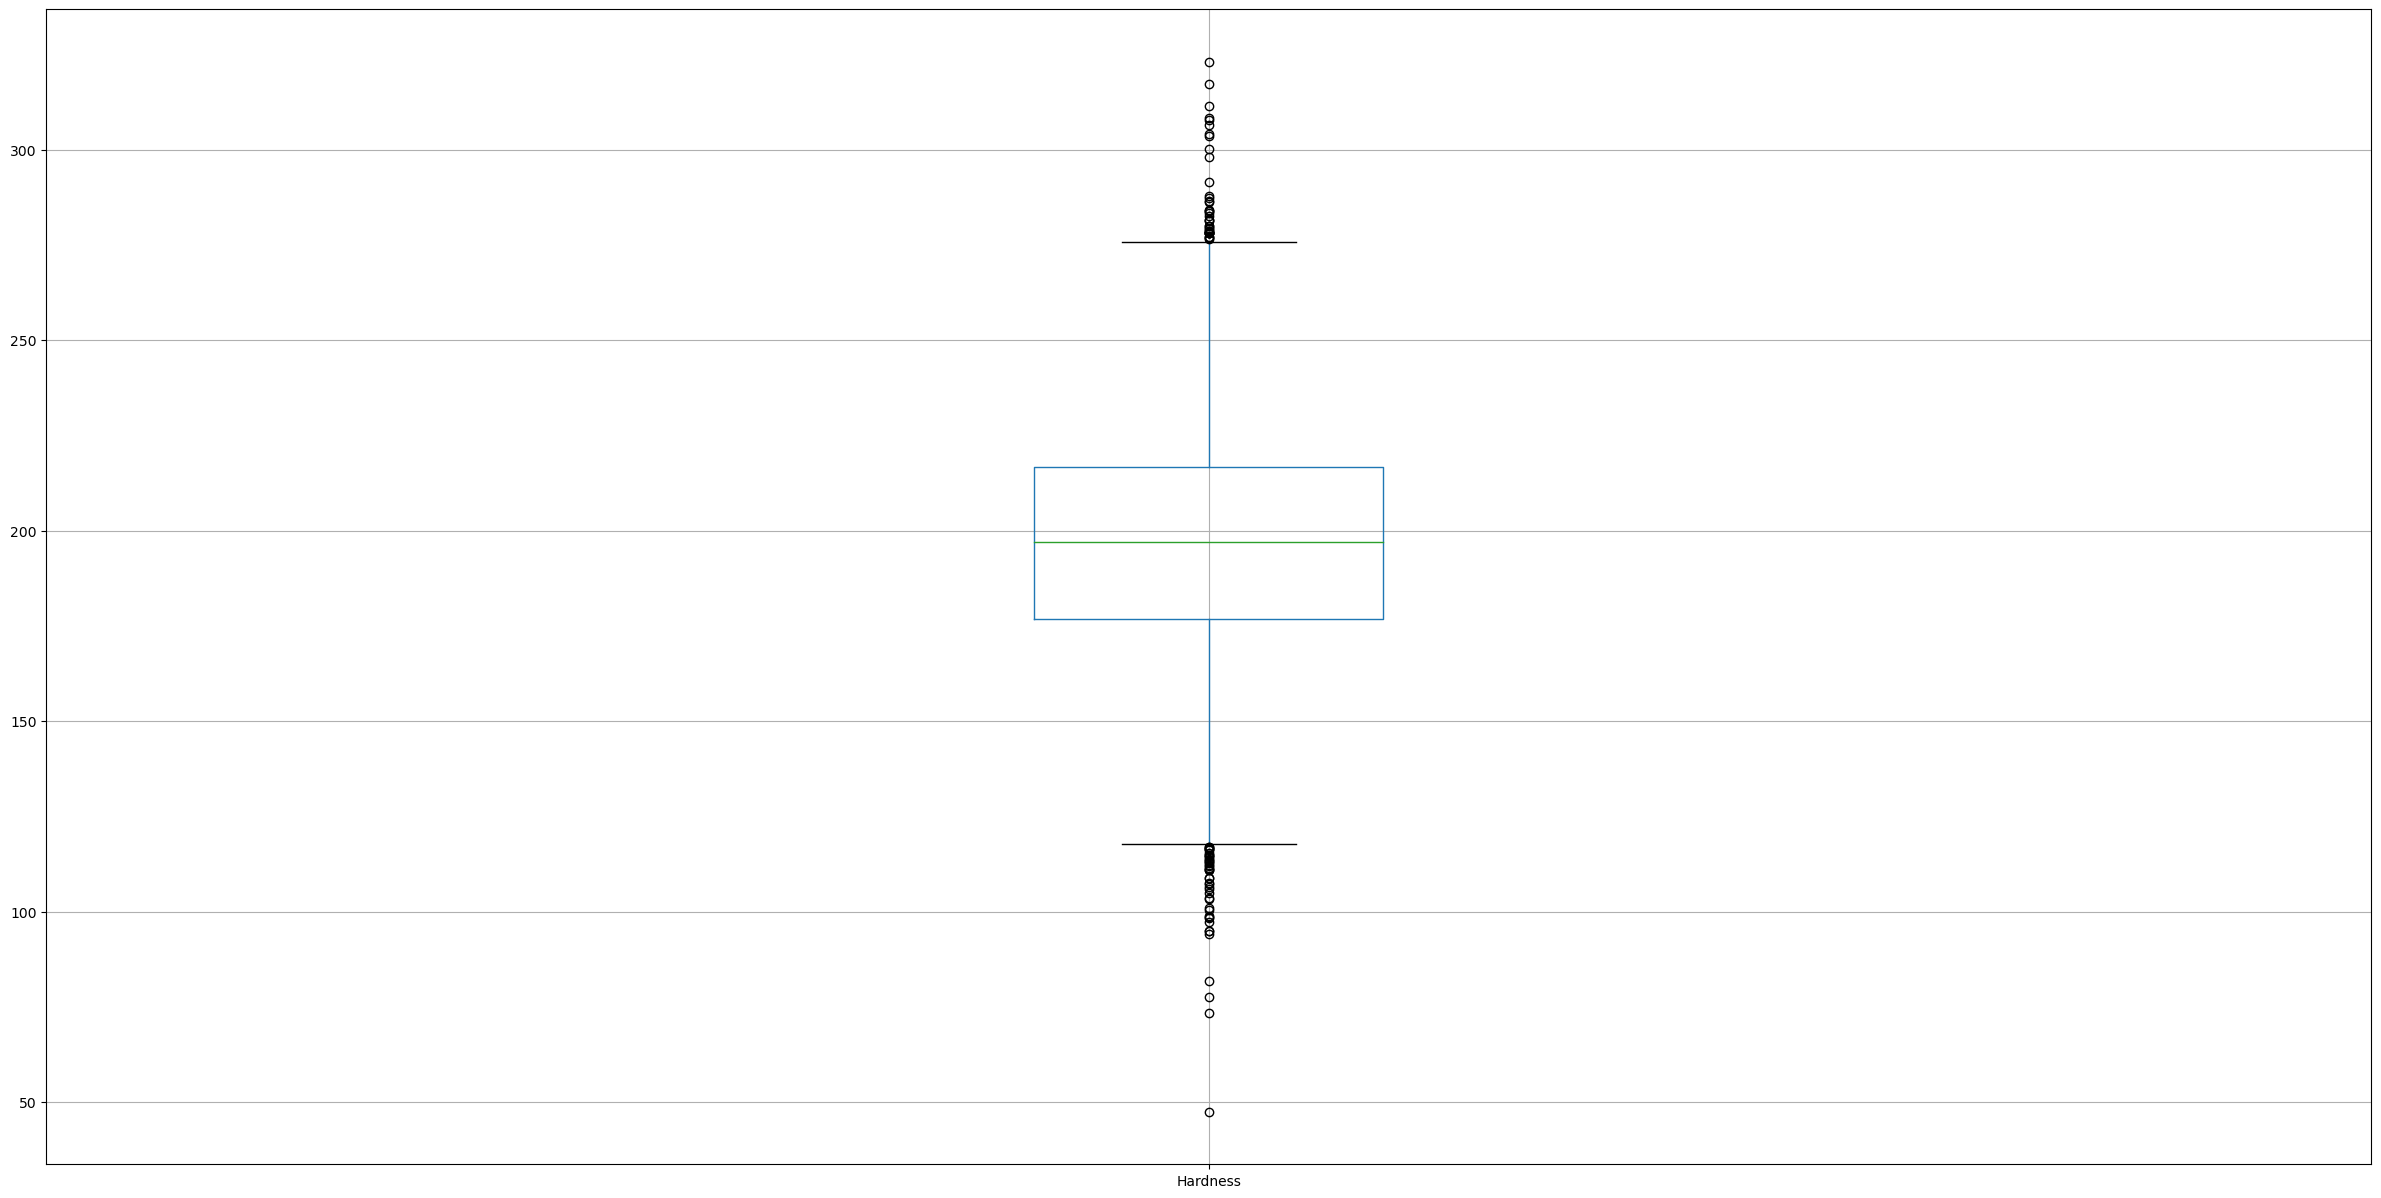

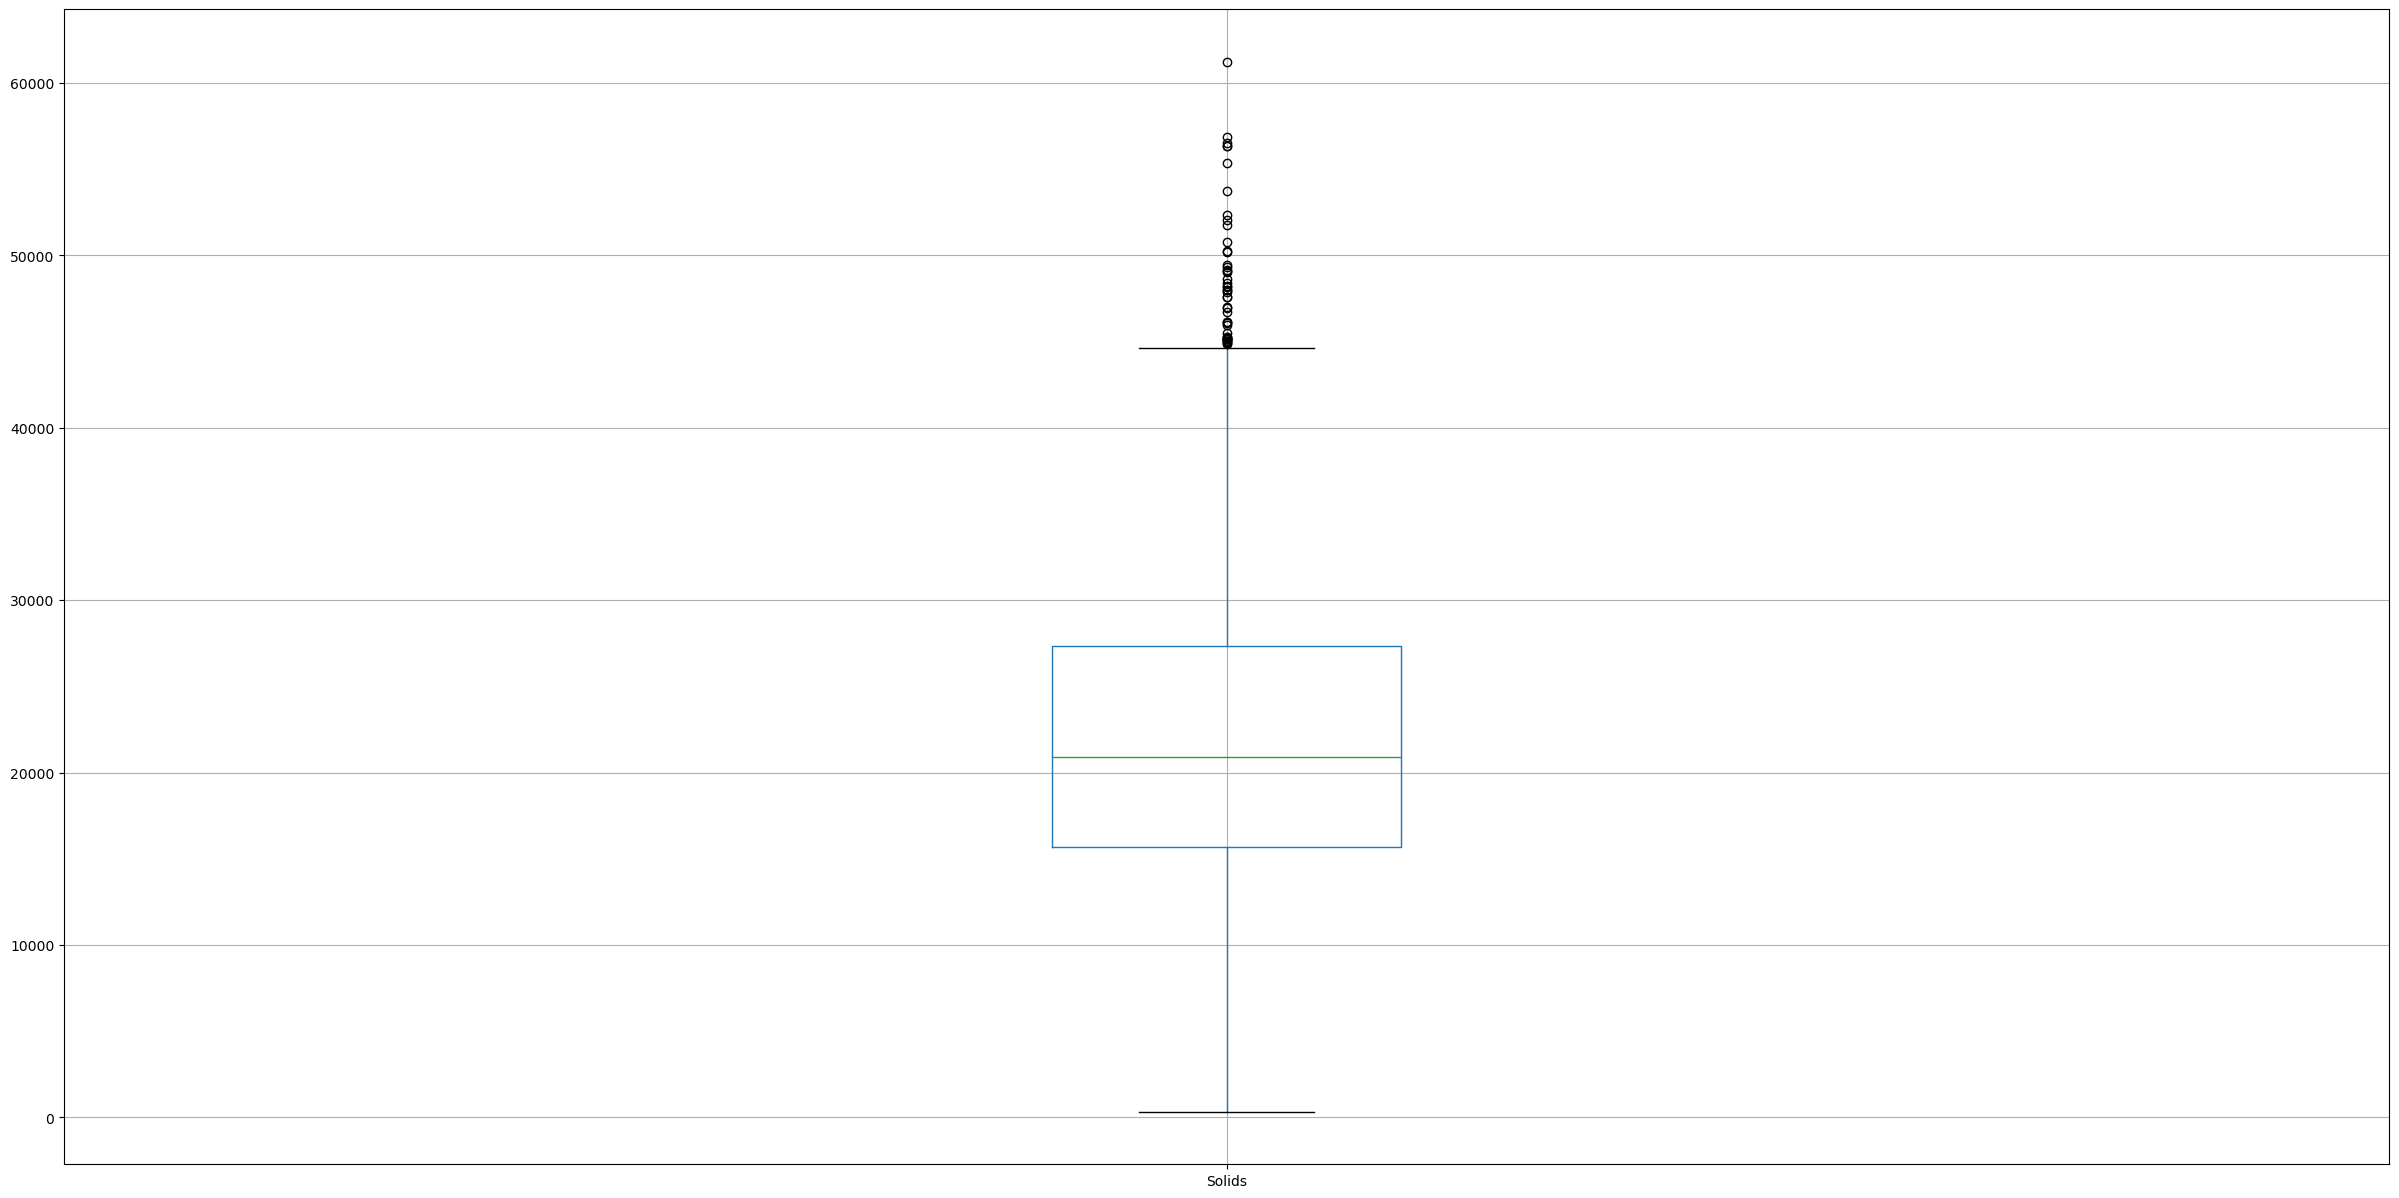

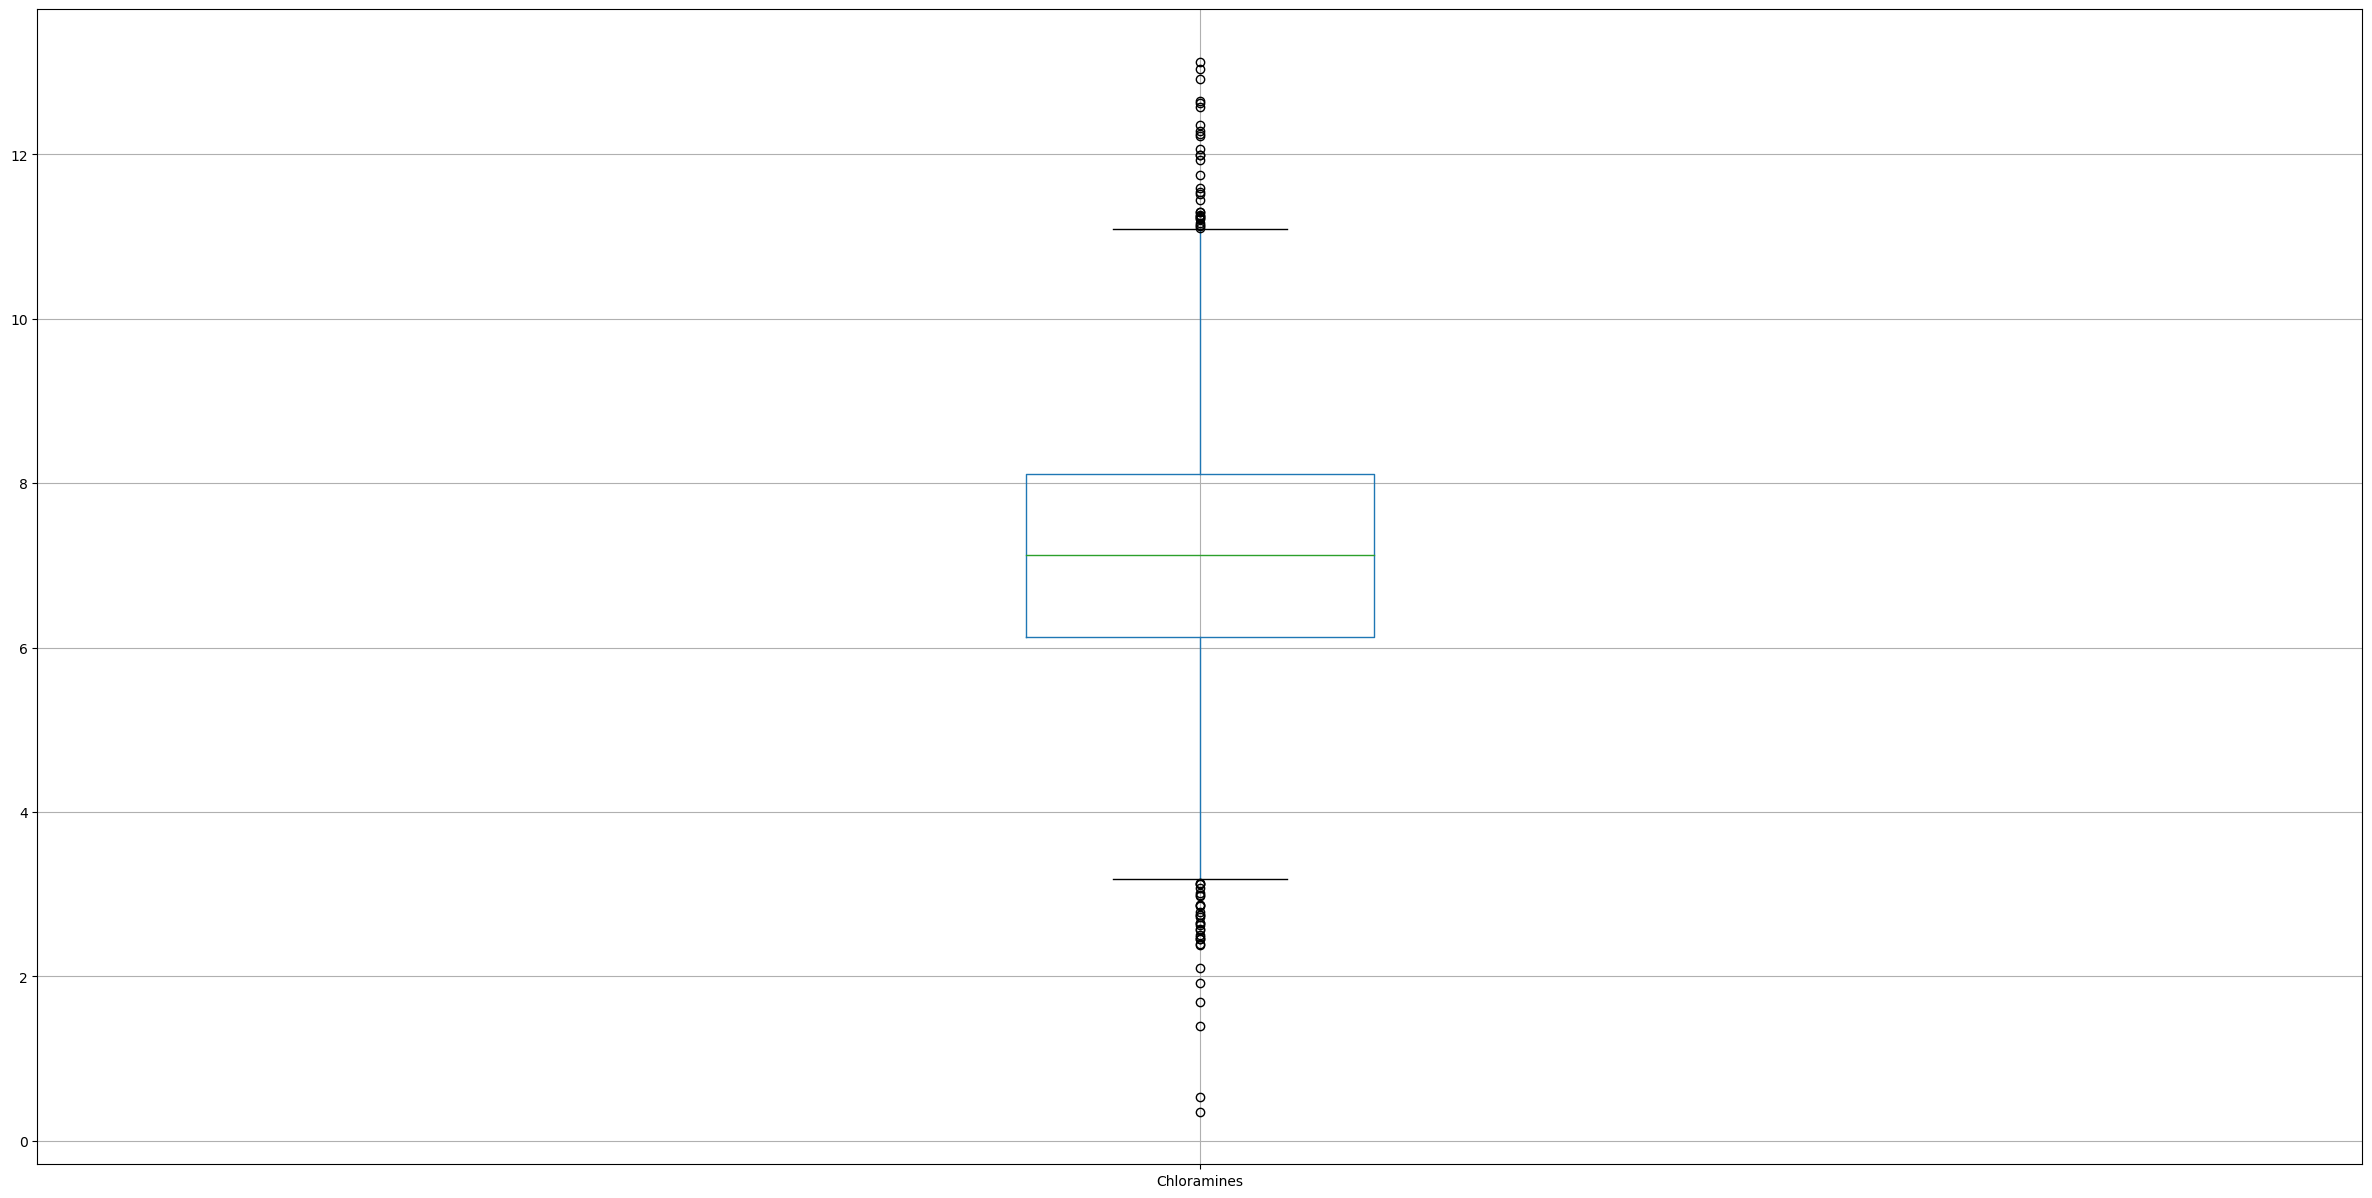

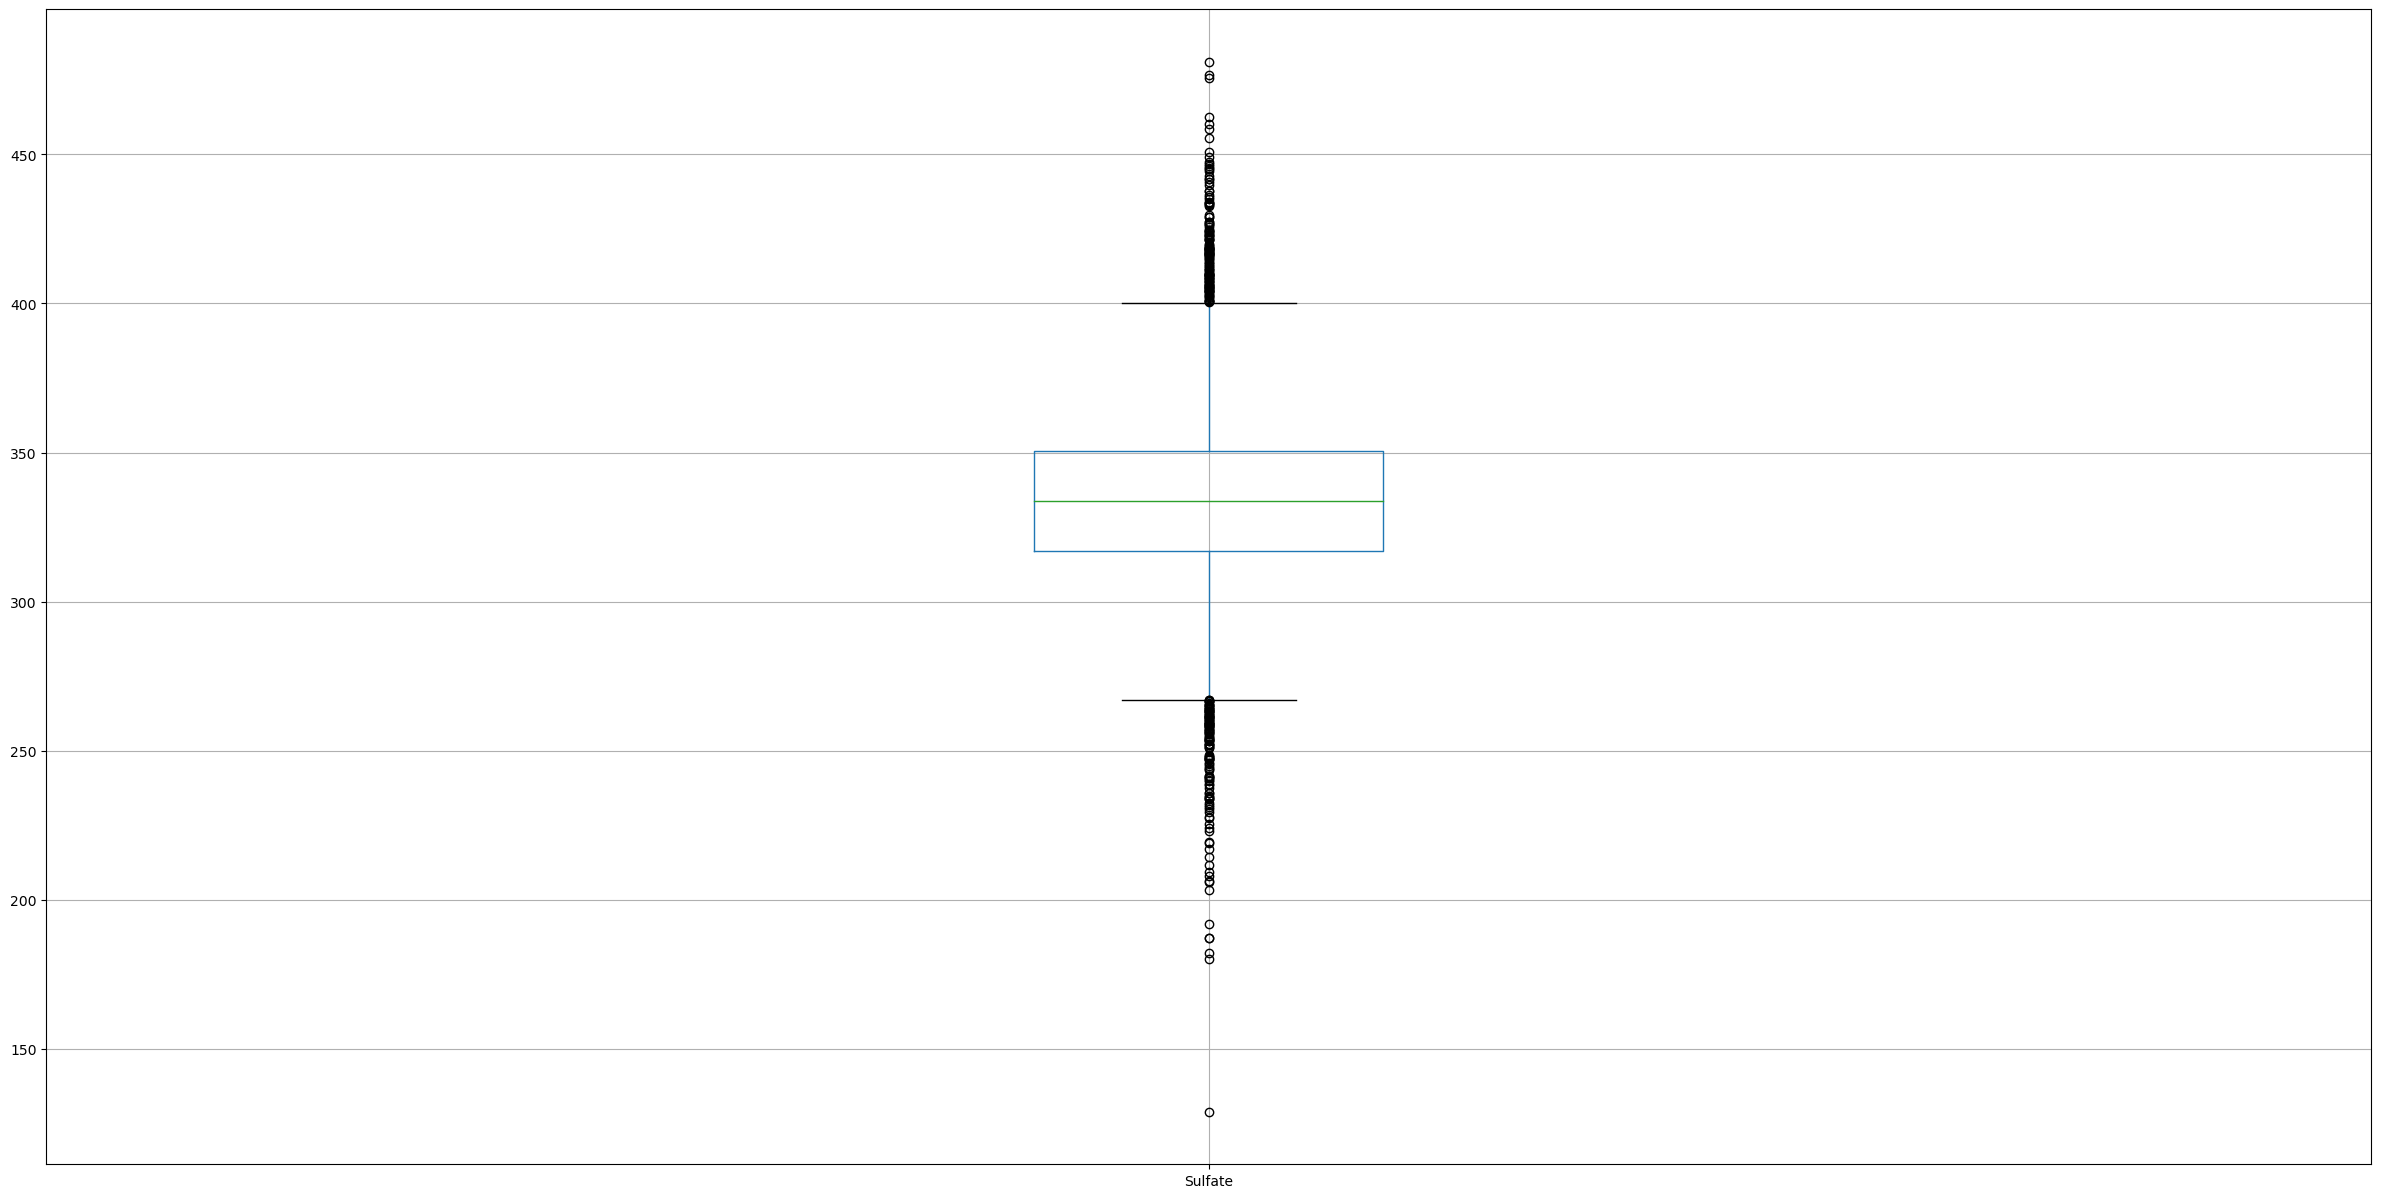

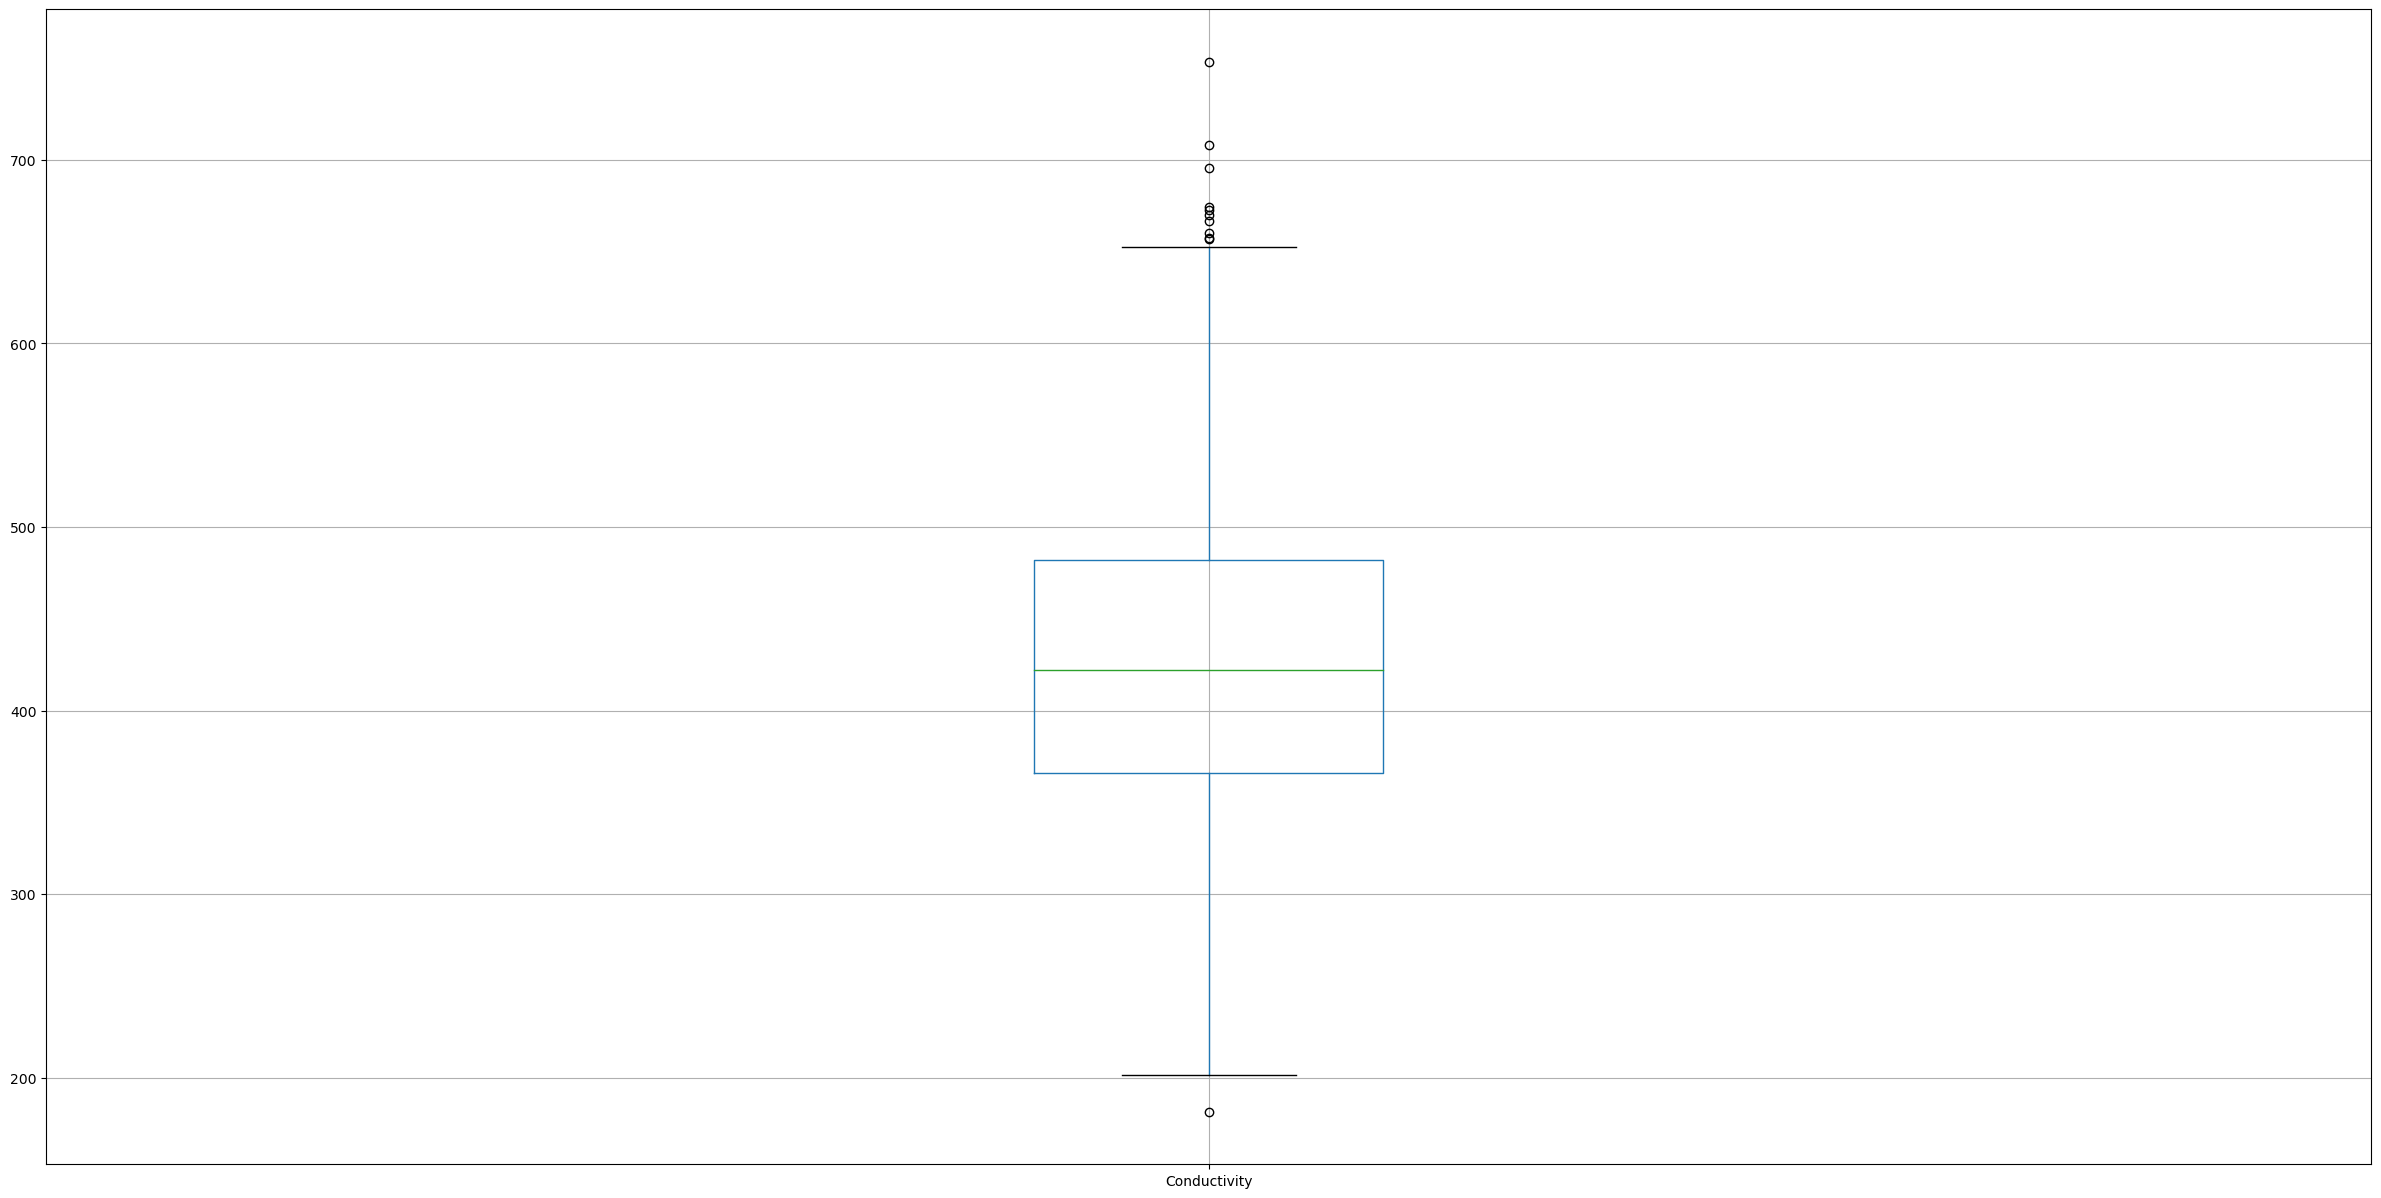

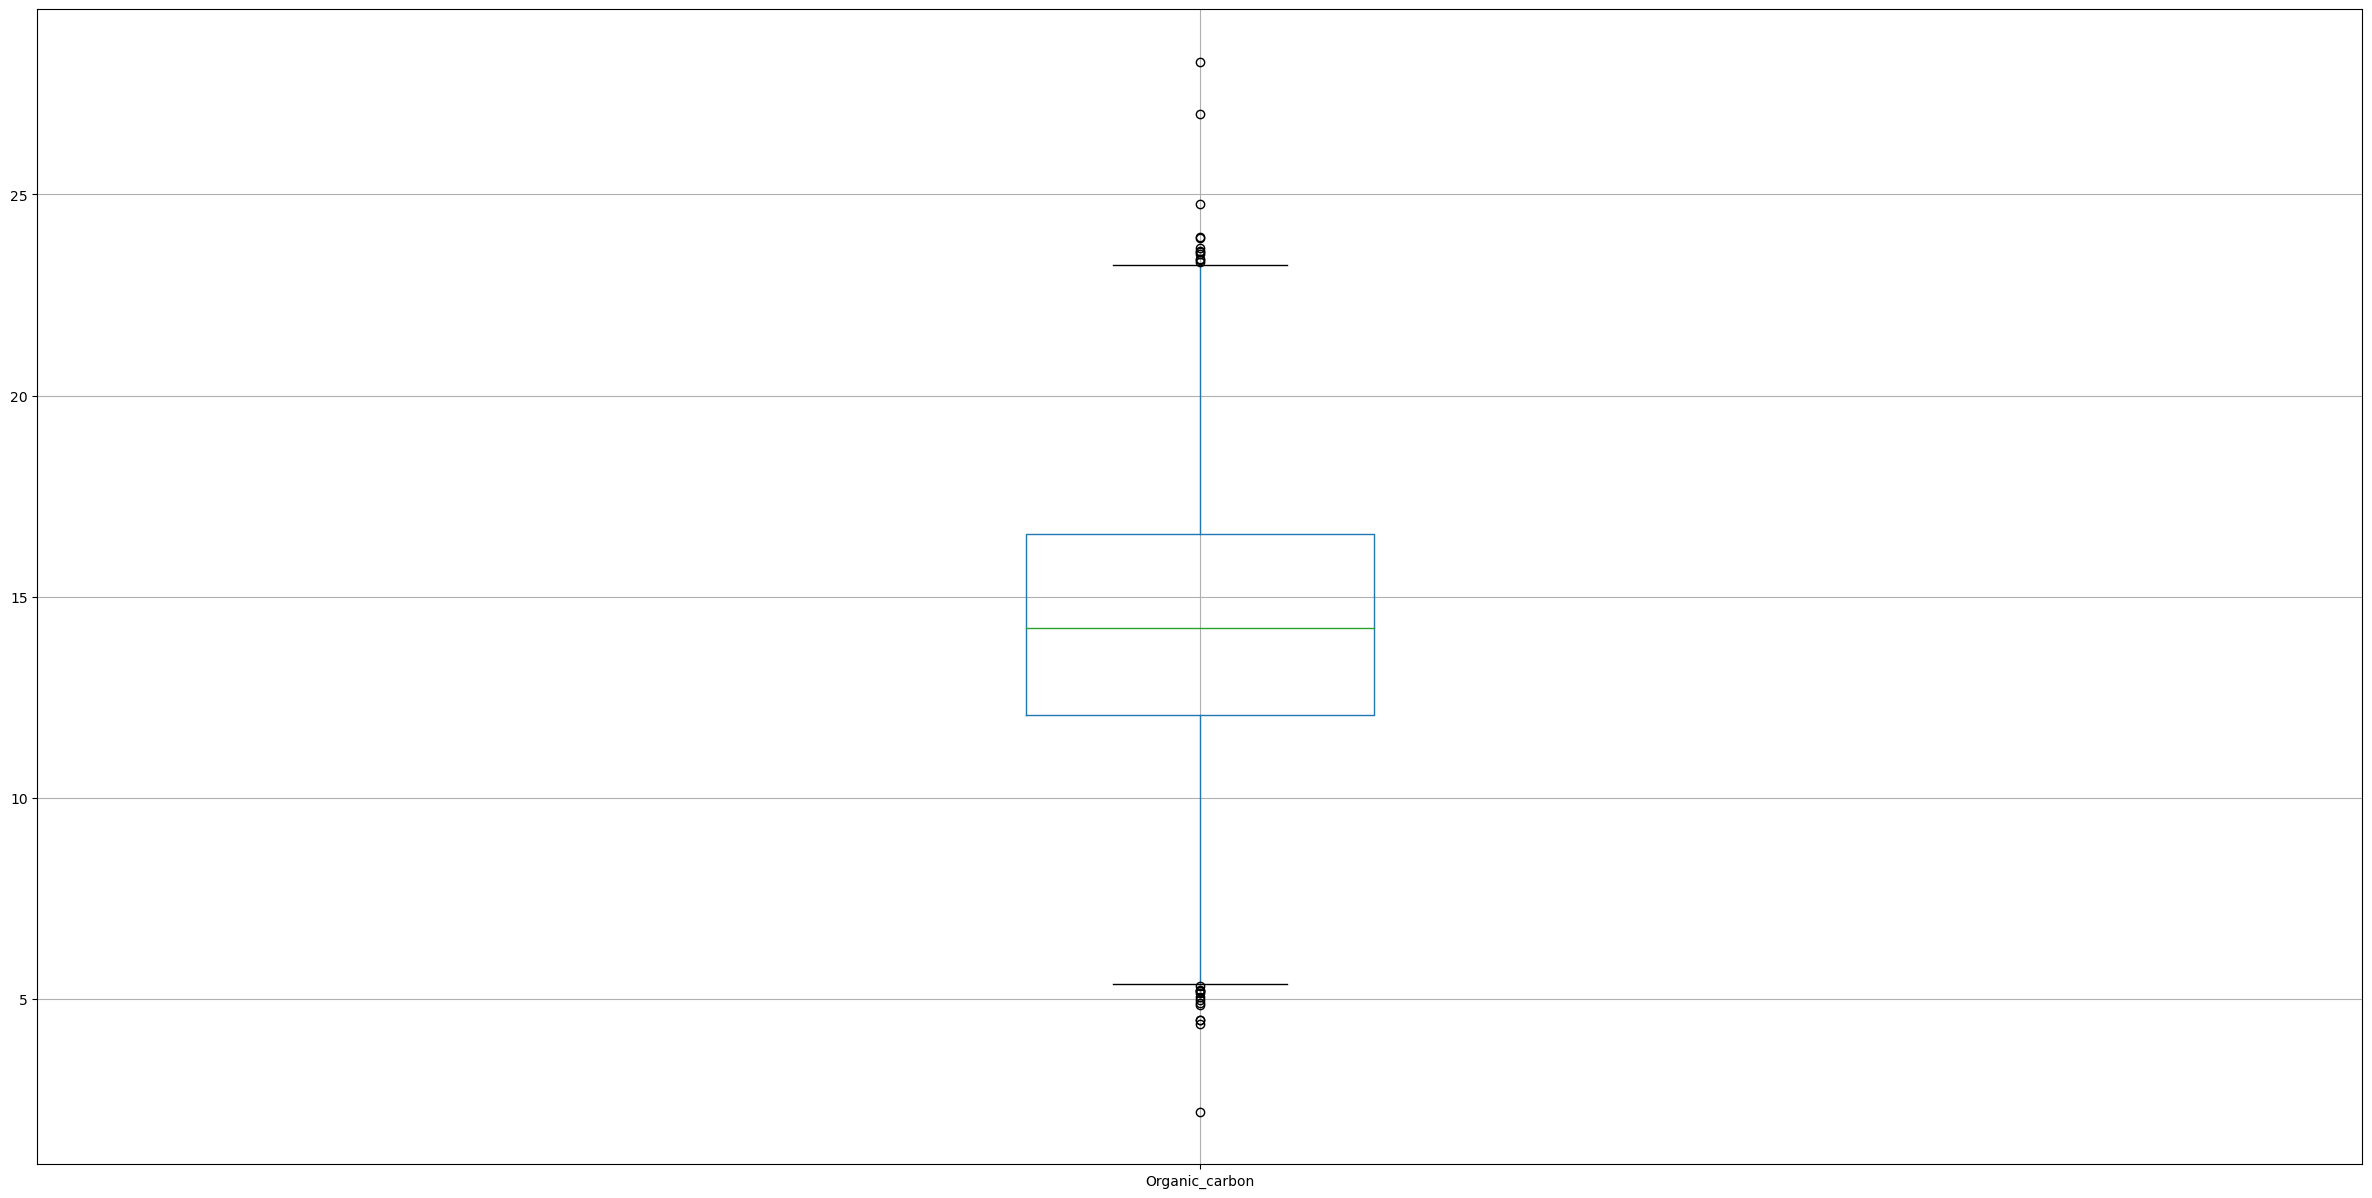

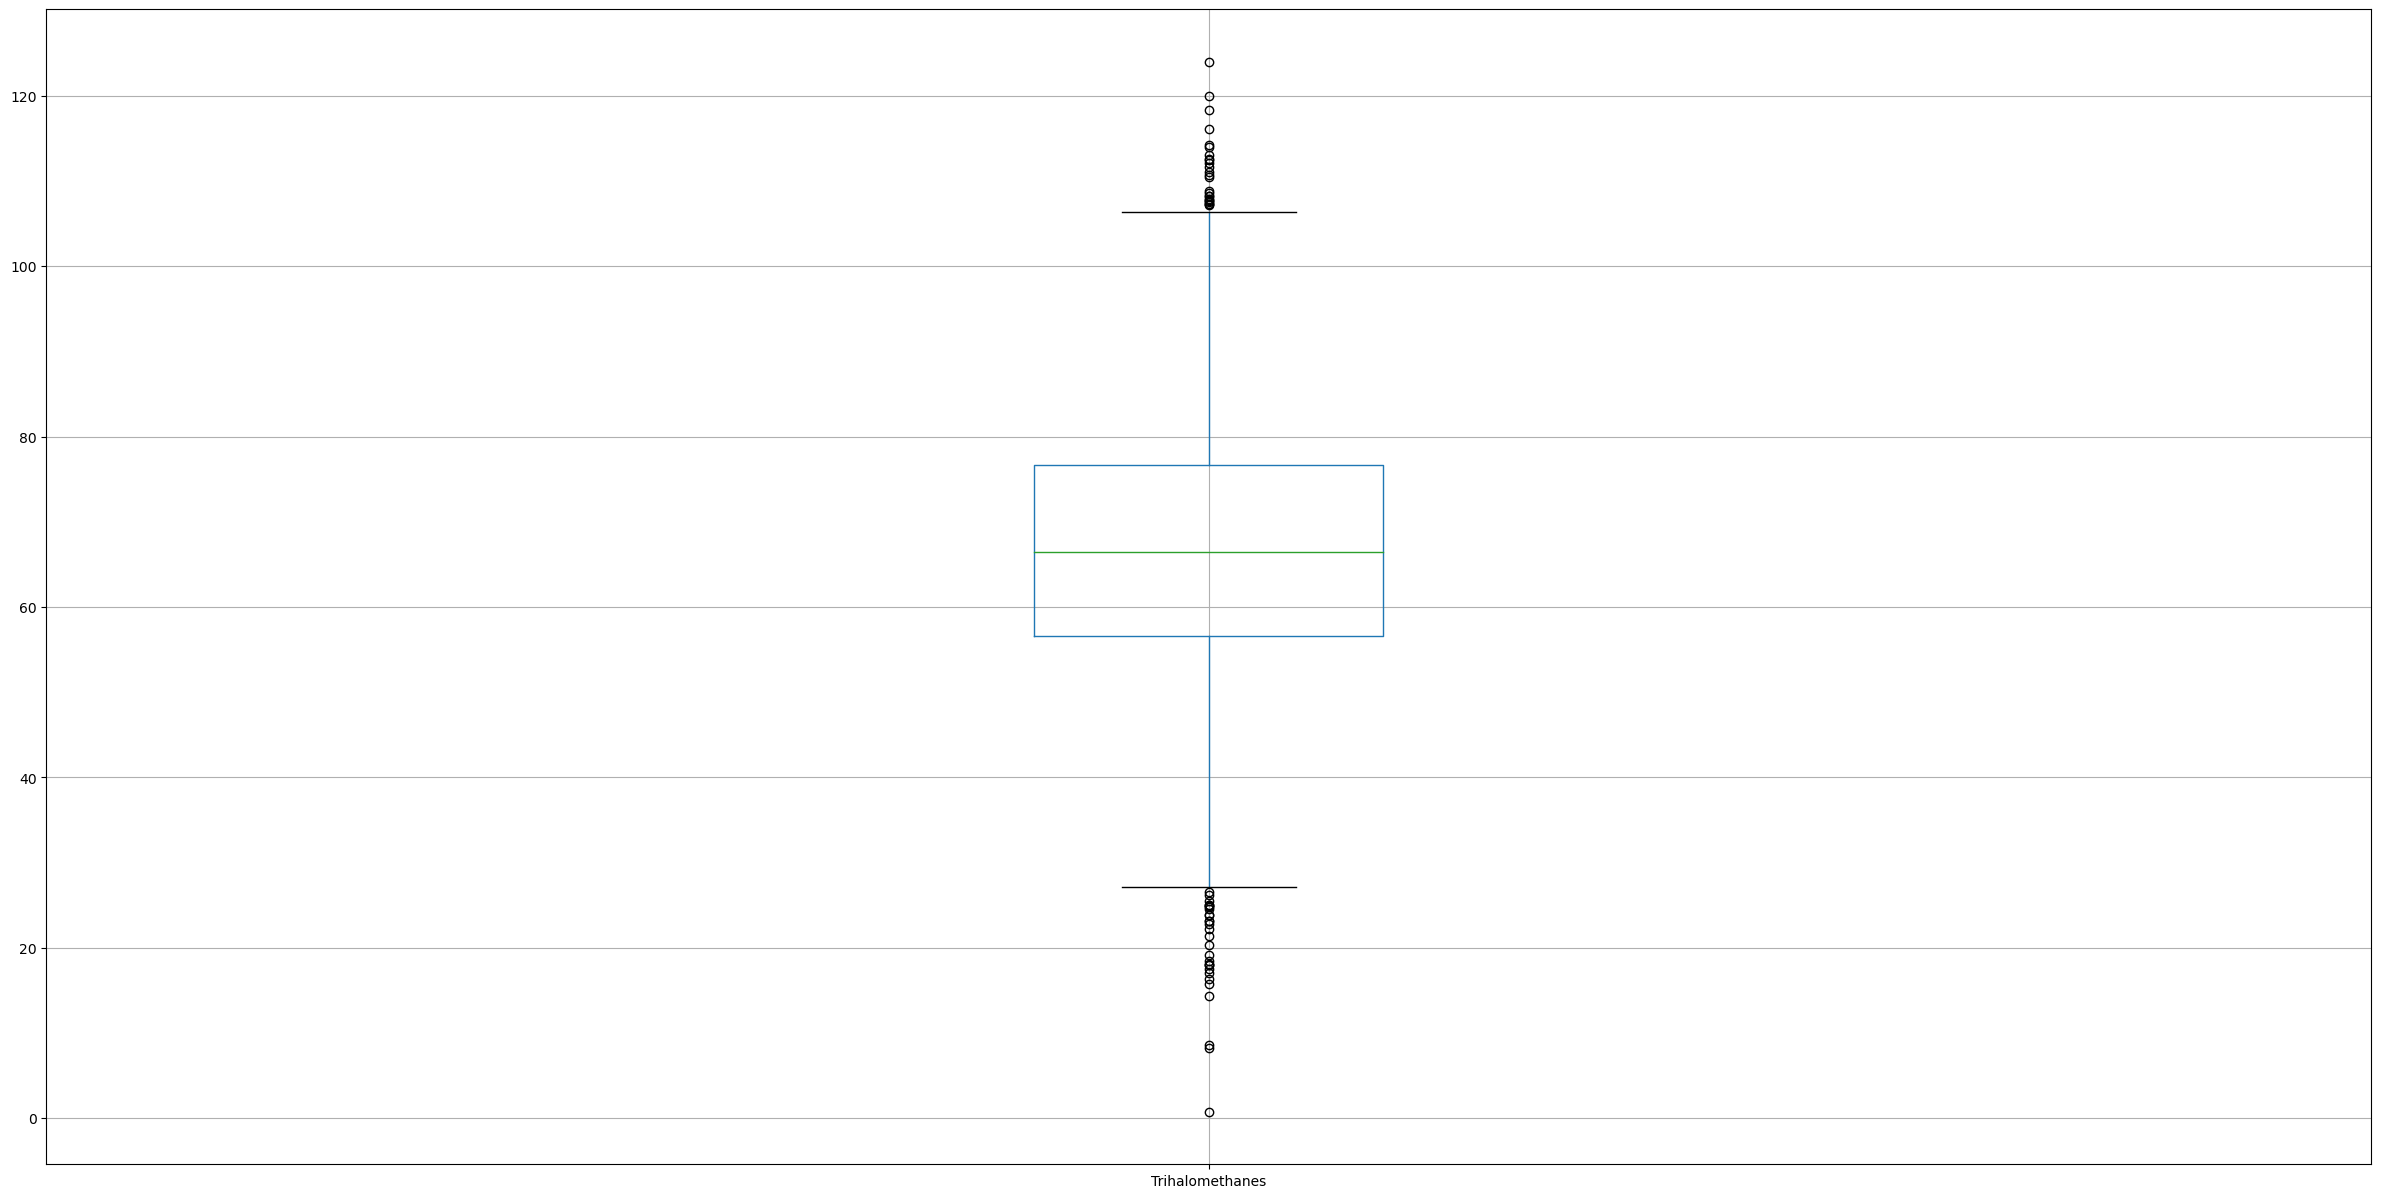

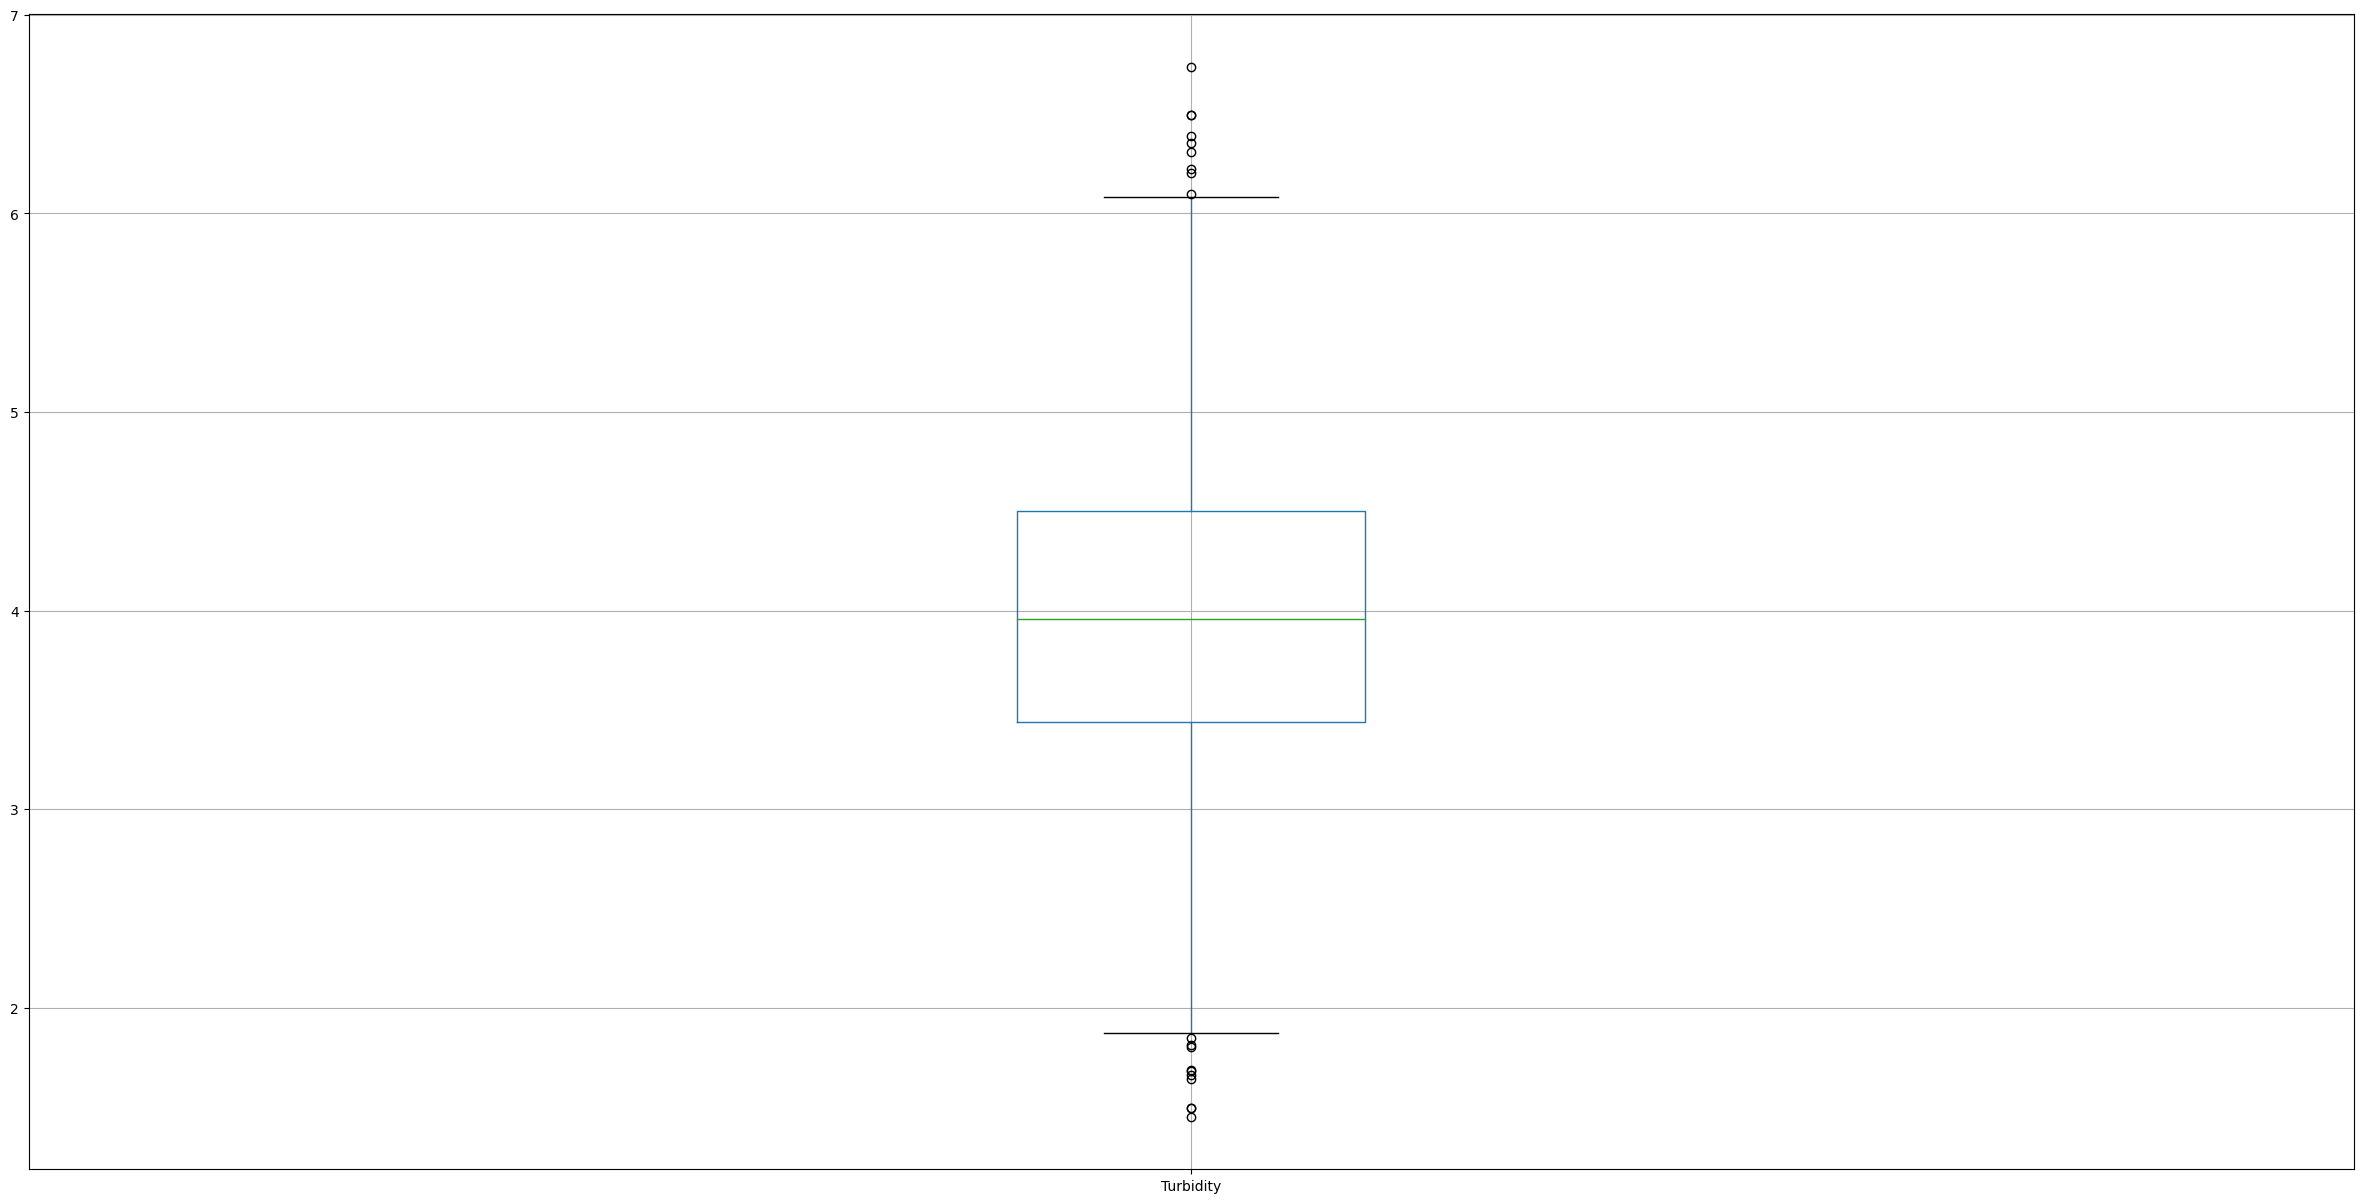

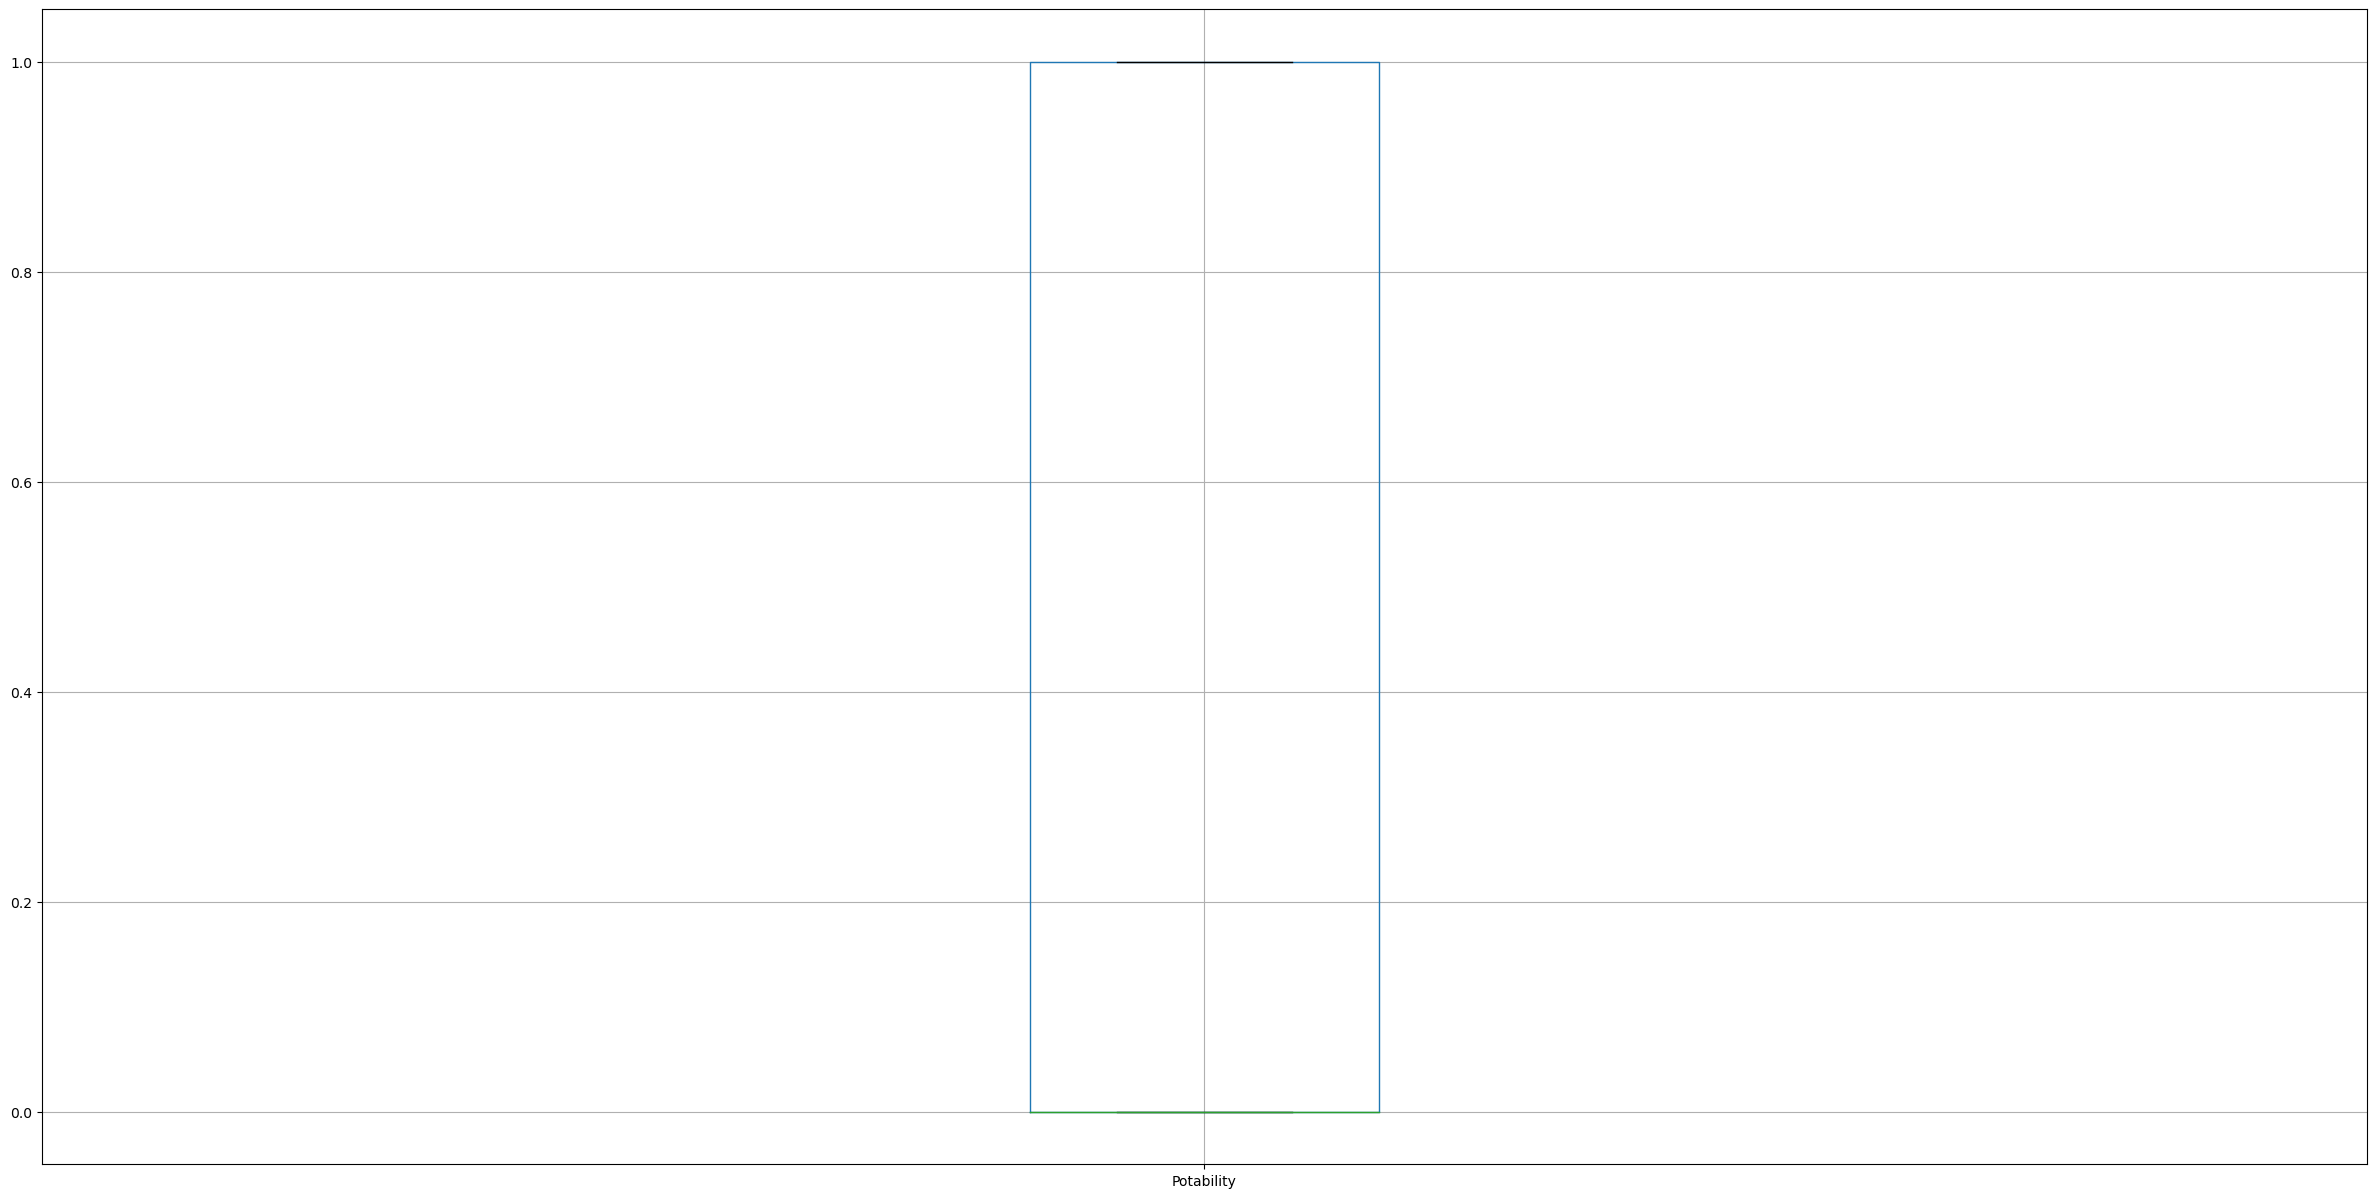

In [647]:
for column in data.columns:
    plt.figure()
    data.boxplot([column])

In [648]:
data.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        -0.012690  -0.014449   
Solids               0.013831        0.010242        -0.008875   0.019546   
Chloramines         -0.020486       -0.012653         0.016627   0.002363   
Sulfate             -0.014059        0.026909        -0.025605  -0.009790   
Conductivity         1.000000        0.020966         0.001255   0.005798   
Organic_carbon       0.020966        1.000000        -0.012976  -0.027308   
Trihalomethanes      0.001255       -0.012976         1.000000  -0.021502   
Turbidity            0.005798       -0.027308        -0.021502   1.000000   
Potability          -0.008128       -0.030001         0.006960   0.001581   

                 Potability  
ph                -0.003287  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.020619  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.006960  
Turbidity          0.001581  
Potability         1.000000

<Axes: >

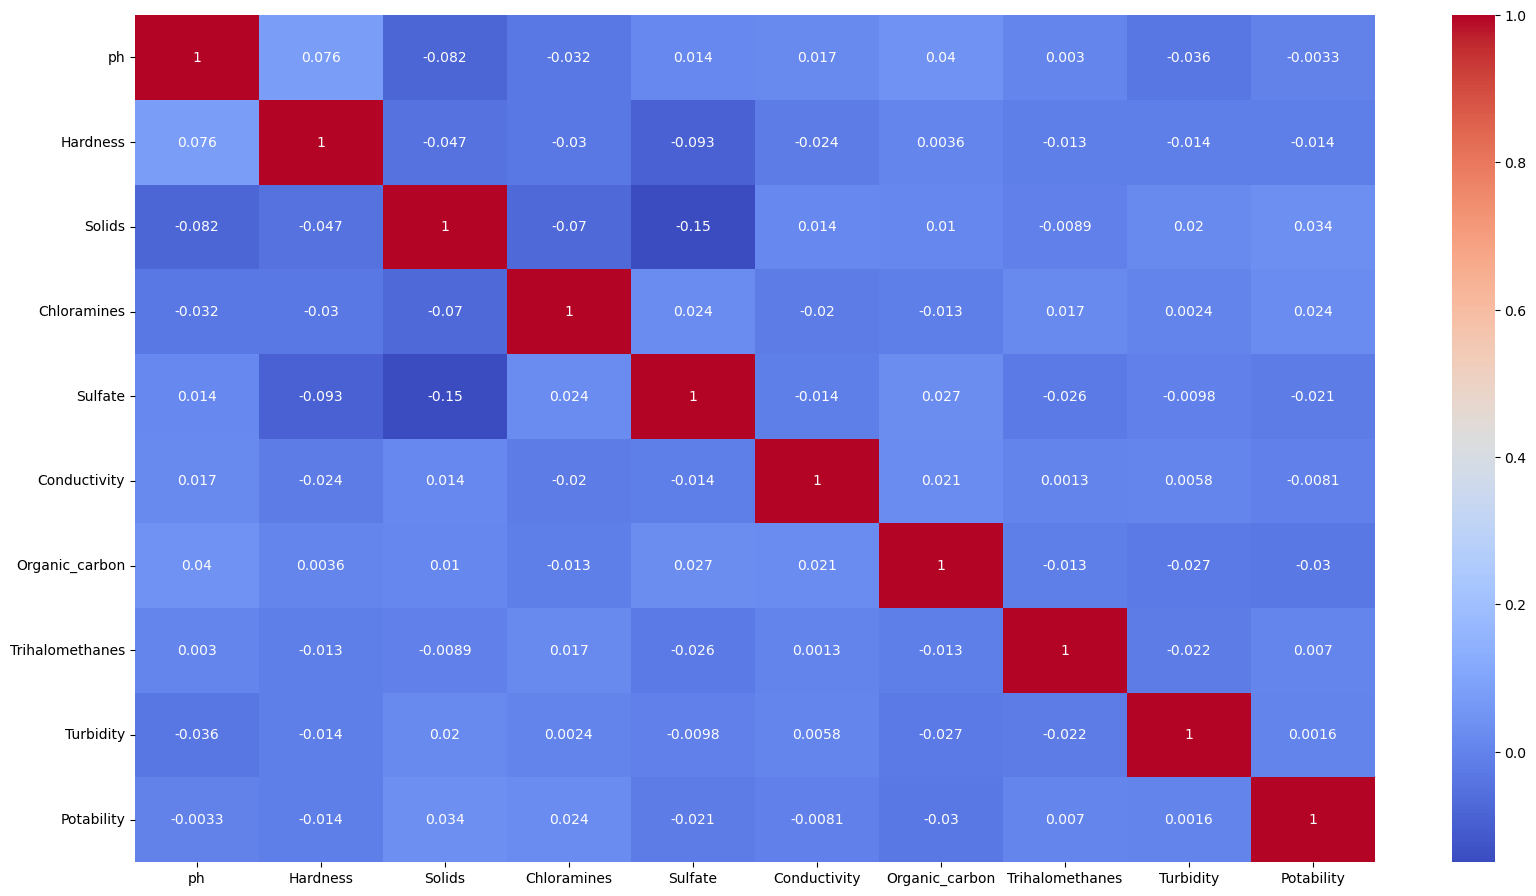

In [649]:
plt.figure(figsize=(20,11))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

# feature engineering

In [650]:
x=data.drop("Potability",axis=1)
y=data["Potability"]

In [651]:
x.shape,y.shape

((3276, 9), (3276,))

In [652]:
Scalar=StandardScaler()
x=Scalar.fit_transform(x,y)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [661]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20,random_state=33)

In [662]:
x_train.shape,x_test.shape


((2620, 9), (656, 9))

In [663]:
# intiamlize classifer 
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    
}

# Logistic Regression


In [664]:
param_grid = {
    'C': [0.1, 1, 10, 100],     # Regularization parameter
    'solver': ['liblinear',"saga"],  # Optimization algorithms
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}
# create a model 
Logistic_Regression= LogisticRegression(max_iter=1000)
    
# Grid search with cross-validation
grid_search = GridSearchCV(Logistic_Regression,param_grid=param_grid)
grid_search.fit(x_train, y_train)

# Best model from grid search
best_logreg = grid_search.best_estimator_

# Predict on the test set
y_pred = best_logreg.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Logistic Regression Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm1=confusion_matrix(y_test,y_pred)
cm1

Best Logistic Regression Model Accuracy: 0.6280

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       410
           1       1.00      0.01      0.02       246

    accuracy                           0.63       656
   macro avg       0.81      0.50      0.39       656
weighted avg       0.77      0.63      0.49       656



array([[410,   0],
       [244,   2]], dtype=int64)

# Random Forest Classifier

In [665]:
from sklearn.ensemble import RandomForestClassifier 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Initialize the RandomForestClassifier
model_Rand_forest= RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [5, 10, 15],        # Number of trees in the forest
    'max_depth': [ 1, 2, 3],        # Maximum depth of the tree
    'min_samples_split': [5, 10, 20],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
             # Whether bootstrap samples are used when building trees
}


In [666]:
model_Rand_forest.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [667]:
predict_Rf=model_Rand_forest.predict(x_test)


In [668]:
acc_Rf=accuracy_score(y_test,predict_Rf)

In [669]:
acc_Rf*100


68.59756097560977

In [670]:
accuracy = accuracy_score(y_test, predict_Rf)
print(f"Best Randomforest Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, predict_Rf))

Best Randomforest Model Accuracy: 0.6860

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       410
           1       0.64      0.38      0.47       246

    accuracy                           0.69       656
   macro avg       0.67      0.62      0.63       656
weighted avg       0.68      0.69      0.66       656



In [671]:
#confusion matrix
cm3=confusion_matrix(y_test,predict_Rf)
cm3

array([[357,  53],
       [153,  93]], dtype=int64)

# KNeighbors Classifier

In [672]:
from sklearn.neighbors import KNeighborsClassifier


In [673]:
model_KNN=KNeighborsClassifier(n_neighbors=10, weights='uniform',
    algorithm='auto',
    leaf_size=40,
    p=5,
    metric='minkowski'
    )
model_KNN.fit(x_train,y_train)
predict_KNN=model_KNN.predict(x_test)


In [676]:
acc_kNN=accuracy_score(y_test,predict_KNN)
acc_kNN*100

65.70121951219512

In [677]:
accuracy = accuracy_score(y_test, predict_KNN)
print(f"Best KNN Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, predict_KNN))

Best KNN Model Accuracy: 0.6570

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       410
           1       0.60      0.25      0.36       246

    accuracy                           0.66       656
   macro avg       0.63      0.58      0.56       656
weighted avg       0.64      0.66      0.61       656



In [678]:
cm2=confusion_matrix(y_test,predict_KNN)
cm2

array([[369,  41],
       [184,  62]], dtype=int64)

# Support vector Machine(SVM)

In [679]:
from sklearn.svm import SVC

model_SVM=SVC( kernel='rbf',degree=3,  gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200, )
  





In [680]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model_SVM.fit(x_train,y_train)

SVC()

In [681]:
predict_SVM=model_SVM.predict(x_test)

In [682]:
acc_SVM=accuracy_score(y_test,predict_SVM)
acc_SVM*100

68.59756097560977

In [683]:
accuracy = accuracy_score(y_test, predict_SVM)
print(f"Best SVM Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, predict_SVM))

Best SVM Model Accuracy: 0.6860

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       410
           1       0.69      0.30      0.41       246

    accuracy                           0.69       656
   macro avg       0.69      0.61      0.60       656
weighted avg       0.69      0.69      0.65       656



In [684]:
cm3=confusion_matrix(y_test,predict_SVM)
cm3

array([[377,  33],
       [173,  73]], dtype=int64)

# XGBoost

In [685]:
import xgboost as xgb
model_XG = xgb.XGBClassifier()
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model_XG.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [686]:
predict_XG=model_XG.predict(x_test)

In [687]:
acc_XG=accuracy_score(y_test,predict_XG)
acc_XG*100

64.63414634146342

In [688]:
accuracy = accuracy_score(y_test, predict_XG)
print(f"Best XGBoost Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, predict_XG))

Best XGBoost Model Accuracy: 0.6463

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       410
           1       0.53      0.44      0.48       246

    accuracy                           0.65       656
   macro avg       0.62      0.60      0.61       656
weighted avg       0.64      0.65      0.64       656



In [689]:
cm4=confusion_matrix(y_test,predict_XG)
cm4

array([[316,  94],
       [138, 108]], dtype=int64)